# IMPORT LIBRARIES

Required Installations : 

In [ ]:
!pip install empath
!pip install wordcloud
!pip install matplotlib-venn
!pip install plotly

In [1]:
# numpy for numerical computing
import numpy as np

#seaborn for data visualisation
import seaborn as sns

# pandas for data analysis and data manipulation
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# matplotlib for data visualisation
import matplotlib.pyplot as plt            

# for counting the number of occurences of each value in a list
from collections import Counter 

# import sklearn libraries for the random forest classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#for interactive plots
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.widgets import Slider

#T-test 
from scipy import stats

# anova test
from sklearn.metrics import r2_score

#for linear regression
import statsmodels.formula.api as smf

#for venn diagram
from matplotlib_venn import venn2

# Import the wordcloud library
from wordcloud import WordCloud

# Analysis of the lexical fields
from empath import Empath 

***
# Import dataframes

##### PATHS

In [2]:
DIR = "../data/"

READ_TIMESERIES_PATH = DIR + "ent_timeseries_15p.tsv.zip"
READ_CHANNELS_PATH   = DIR + "ent_channels_15p.tsv.zip"
READ_METADATA_PATH   = DIR + "ent_metadata_15p.tsv.zip"

##### OPEN DATAFRAMES

In [3]:
# entertainment timeseries
ent_timeseries = pd.read_csv(READ_TIMESERIES_PATH)
ent_timeseries.datetime = pd.to_datetime(ent_timeseries.datetime)

# entertainment channels
ent_channels   = pd.read_csv(READ_CHANNELS_PATH)
ent_channels.join_date = pd.to_datetime(ent_channels.join_date)

# entertainment metadata
ent_metadata   = pd.read_csv(READ_METADATA_PATH)
ent_metadata.upload_date = pd.to_datetime(ent_metadata.upload_date)

***
# Display dataframes

##### CHANNELS

In [4]:
#sort channels by evolution score
ent_channels.sort_values(by=['growth_score'], inplace=True, ascending=False)

#display
ent_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,last_date,last_subs,period,growth_score,has_buzzed
0,Entertainment,2015-05-12,UCk8GzjMOrta8yxDcKfylJYw,✿ Kids Diana Show,34700000,599,16.0,2.0870,2019-09-30 00:00:00,3.501429e+07,1602 days 00:00:00,21856.607812,1
1,Entertainment,2015-08-29,UCG8rbF3g2AMX70yOd8vqIZg,Logan Paul Vlogs,19800000,645,136.0,2.0870,2019-09-30 00:00:00,1.980000e+07,1493 days 00:00:00,13261.888814,1
2,Entertainment,2015-03-17,UChGJGhZ9SOOHvBB0Y4DOO_w,Ryan ToysReview,21600000,1512,95.0,2.0870,2019-09-30 00:00:00,2.170000e+07,1658 days 00:00:00,13088.057901,1
3,Entertainment,2014-05-13,UCKqx9r4mrFglauNBJc1L_eg,[토이푸딩] ToyPu...,25600000,2851,80.0,2.0870,2019-09-30 00:00:00,2.560000e+07,1966 days 00:00:00,13021.363174,1
4,Entertainment,2017-09-04,UCq8KR1lnewd5ZPx9_XKoubg,Johny FamilyShow,9250944,209,628.0,2.0870,2019-09-30 00:00:00,9.240000e+06,756 days 00:00:00,12222.222222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,Entertainment,2007-07-26,UCiHMMP-b6B1vM-Apsa0wZQQ,Beatriz Mariano,19149,42,564620.0,8.2880,2016-06-27 00:00:00,2.091125e+03,3259 days 00:00:00,0.641646,0
6728,Entertainment,2019-01-21,UCIDCS0M6EVLtjN8jtnkXNAg,Amberri,29200,17,385849.0,6.6470,2019-05-27 01:00:00,3.978241e+01,126 days 01:00:00,0.315733,0
6729,Entertainment,2011-09-20,UCqtco3r7CJQ2n4Y9j4hTL9Q,Salil Jamdar & Co.,374069,14,45282.0,3.3295,2018-01-07 23:00:00,5.797235e+02,2301 days 23:00:00,0.251944,0
6730,Entertainment,2015-07-21,UCH6PcEuNFkEUkbVTAdvWmFQ,BLORANGETIGER,12800,123,626098.0,11.1550,2017-07-03 00:00:00,1.140000e+02,713 days 00:00:00,0.159888,0


##### TIMESERIES

In [5]:
ent_timeseries

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,has_buzzed
0,UCCBg60LfTbGQLa60A_IJP0A,Entertainment,2016-03-14 00:00:00,4.510483e+06,1.477933e+04,1.105900e+04,0.000000,100,0,0,0
1,UCCBg60LfTbGQLa60A_IJP0A,Entertainment,2016-03-21 00:00:00,4.544995e+06,3.451197e+04,1.111703e+04,58.031414,100,0,0,0
2,UCCBg60LfTbGQLa60A_IJP0A,Entertainment,2016-03-28 01:00:00,4.579649e+06,3.465389e+04,1.115918e+04,42.144512,100,0,0,0
3,UCCBg60LfTbGQLa60A_IJP0A,Entertainment,2016-04-04 01:00:00,4.611097e+06,3.144789e+04,1.118873e+04,29.555556,101,1,1,0
4,UCCBg60LfTbGQLa60A_IJP0A,Entertainment,2016-04-11 01:00:00,4.635242e+06,2.414538e+04,1.122662e+04,37.888310,101,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
965195,UCY6Ij8zOds0WJEeqCLOnqOQ,Entertainment,2019-09-02 00:00:00,1.519259e+08,4.517518e+06,1.535577e+06,31061.875000,164,1,2,1
965196,UCY6Ij8zOds0WJEeqCLOnqOQ,Entertainment,2019-09-09 00:00:00,1.554422e+08,3.516317e+06,1.558057e+06,22479.625000,165,1,2,1
965197,UCY6Ij8zOds0WJEeqCLOnqOQ,Entertainment,2019-09-16 00:00:00,1.582264e+08,2.784177e+06,1.568507e+06,10450.125000,166,1,2,1
965198,UCY6Ij8zOds0WJEeqCLOnqOQ,Entertainment,2019-09-23 00:00:00,1.617288e+08,3.502370e+06,1.592500e+06,23992.875000,167,1,2,1


##### METADATA

In [6]:
#rename channel column in metadata
ent_metadata.rename(columns={'channel_id': 'channel'}, inplace=True)

#add column with has_buzzed in metadata
ent_metadata = pd.merge(ent_metadata, ent_channels[['channel', 'has_buzzed']], on='channel')

#displat
ent_metadata

,channel,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,has_buzzed
0,UCzzgEOi0xR9SuflkXmTQv6g,1.0,22JnX-c9vKA,226,2.0,"andy,grant,strike,out,italo,disco,hi,nrg,eurod...",Andy Grant - Strike Out (1988),2019-07-16,94.0,0
1,UCzzgEOi0xR9SuflkXmTQv6g,2.0,DdigTYiAceg,278,11.0,"smike,musical,smike!,in the warm light of a br...",Smike! - Matthew Paddon & the Kids from Dotheb...,2018-02-16,731.0,0
2,UCzzgEOi0xR9SuflkXmTQv6g,18.0,0Z-qKSJOGw4,142,818.0,"charlie,chocolate,factory,west end,blue,peter,...",Charlie and the Chocolate Factory the musical ...,2016-09-18,170703.0,0
3,UCzzgEOi0xR9SuflkXmTQv6g,10.0,_1Ujr49QZZ8,159,173.0,"matilda,musical,west end,bbc,one show,revoltin...",Matilda the Musical on the BBC One Show,2016-09-12,35347.0,0
4,UCzzgEOi0xR9SuflkXmTQv6g,10.0,ZFczOr5nAb8,280,402.0,"charlie,chocolate,factory,musical,west,end,lon...",All the Charlie Buckets on 'Tonight at the Lon...,2016-06-08,76576.0,0
...,...,...,...,...,...,...,...,...,...,...
5393155,UC-04opG9zmAFWfAa-vRBlhA,1.0,3mqUXabUDZo,77,29.0,"stance,stance socks,nick garcia,jason jessee,s...",STANCE MEN'S SPRING 2013 VIDEO LOOKBOOK,2013-02-13,4336.0,0
5393156,UC-04opG9zmAFWfAa-vRBlhA,0.0,DmzkskaZO-I,67,52.0,"stance,socks,fall 2012,release",STANCE Fall 2012 Sock Release,2012-07-02,9059.0,0
5393157,UC-04opG9zmAFWfAa-vRBlhA,0.0,3NAZfbUPCmc,94,43.0,"stance,socks,spring,2012,uncommon thread",Stance Spring 2012 Sock Line Release - The Unc...,2012-02-16,7796.0,0
5393158,UC-04opG9zmAFWfAa-vRBlhA,0.0,NdyMnGE7i-0,28,2.0,"mitch abshere,captain fin co,surfing,fins,priz...",Mitch Abshere Prize Pack,2011-08-02,1045.0,0


***
# Chose a youtuber as an example : Emma Chamberlain

She starts in 2016-06-13 and in 2017-06-19 she only has 19 subscribers. It means that during a whole year she did not grew. From 2017 she starts growing a lot and ends up with 8.5M subscribers in 2019-06-23.
She is the perfect example of a small youtubers that follows our guidlines to become famous.

- id: `UC78cxCAcp7JfQPgKxYdyGrg`

##### DISPLAY HER CHANNELS INFO

In [5]:
ent_channels[ent_channels.channel == 'UC78cxCAcp7JfQPgKxYdyGrg']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,last_date,last_subs,...,mean_is_tags,mean_view_count,mean_first_person_singular,mean_first_person_plural,mean_second_person,mean_third_person_singular,mean_third_person_plural,mean_positive,mean_negative,week_freq
29,Entertainment,2016-06-13,UC78cxCAcp7JfQPgKxYdyGrg,emma chamberlain,8440000,202,698.0,2.087,2019-09-23,8450000.0,...,1.0,4.358683e+06,0.30198,0.014851,0.054455,0.024752,0.00495,0.153465,0.20297,1.571429


##### DISPLAY HER TIMESERIES INFO

In [6]:
ent_timeseries[ent_timeseries.channel == 'UC78cxCAcp7JfQPgKxYdyGrg']

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,has_buzzed
712170,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-06-19,7.243333e+02,9.033333e+01,1.988889e+01,0.000000,13,0,11,1
712171,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-06-26,1.356667e+03,6.323333e+02,3.311111e+01,13.222222,18,5,12,1
712172,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-07-03,3.962333e+03,2.605667e+03,1.370000e+02,103.888889,24,6,12,1
712173,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-07-10,1.392889e+04,9.966556e+03,5.240000e+02,387.000000,31,7,14,1
712174,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2017-07-17,3.967950e+04,2.575061e+04,1.334500e+03,810.500000,37,6,15,1
...,...,...,...,...,...,...,...,...,...,...,...
712284,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2019-08-26,8.472941e+08,8.928654e+06,8.369411e+06,38919.375000,196,1,3,1
712285,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2019-09-02,8.552876e+08,7.993450e+06,8.398830e+06,29419.500000,197,1,3,1
712286,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2019-09-09,8.629278e+08,7.640159e+06,8.420251e+06,21420.250000,198,1,3,1
712287,UC78cxCAcp7JfQPgKxYdyGrg,Entertainment,2019-09-16,8.694337e+08,6.505938e+06,8.434358e+06,14107.750000,199,1,3,1


##### DISPLAY HER VIDEOS INFO

In [7]:
ent_metadata[ent_metadata.channel == 'UC78cxCAcp7JfQPgKxYdyGrg']

,channel,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,has_buzzed,...,feat,is_tags,numtags,first_person_singular,first_person_plural,second_person,third_person_singular,third_person_plural,positive,negative
4766961,UC78cxCAcp7JfQPgKxYdyGrg,2300.0,0RuYEzD4_wQ,940,150075.0,"emma chamberlain,emma chambie,vlog,youtube,you...",REVIEWING YOUTUBE'S HQ *insane*,2019-10-01,2872268.0,1,...,0,1,7,0,0,0,0,0,0,0
4766962,UC78cxCAcp7JfQPgKxYdyGrg,4443.0,NQEzIrC6bCs,743,202913.0,"emma chamberlain,emma chambie,vlog,24 hours,ch...",LIVING IN MY CLOSET FOR 24 HOURS,2019-09-26,3921216.0,1,...,0,1,6,1,0,0,0,0,0,0
4766963,UC78cxCAcp7JfQPgKxYdyGrg,7707.0,8l2EjG7AZeA,933,228004.0,"emma chamberlain,emma chambie,vlog,thrifting,n...",THRIFTING IN NEW YORK CITY,2019-09-22,4594575.0,1,...,0,1,6,0,0,0,0,0,0,0
4766964,UC78cxCAcp7JfQPgKxYdyGrg,2657.0,6Hf3ezporp8,752,204161.0,"emma chamberlain,emma chambie,vlog,TRYING TO T...",TAKING MY OWN INSTAGRAM PHOTOS *embarrassing*,2019-09-15,3532079.0,1,...,0,1,6,1,0,0,0,0,0,0
4766965,UC78cxCAcp7JfQPgKxYdyGrg,3498.0,TvwFl3N6lF4,781,233154.0,"emma chamberlain,emma chambie,vlog,hawaii,vaca...",GOING INSANE IN HAWAII,2019-09-08,4569745.0,1,...,0,1,5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767158,UC78cxCAcp7JfQPgKxYdyGrg,453.0,F0ZHt40G-bk,353,58626.0,"iMovie,howto,how,to,improve,build,improveyours...",Easy and Affordable Ways to Improve Your Style,2017-06-08,1444277.0,1,...,0,1,42,0,0,1,0,0,1,0
4767159,UC78cxCAcp7JfQPgKxYdyGrg,187.0,lt77_80W10E,311,34428.0,"iMovie,fidget,spinner,fidgetspinner,handspinne...",I NEED A FIDGET SPINNER OK,2017-06-07,724350.0,1,...,0,1,35,1,0,0,0,0,0,1
4767160,UC78cxCAcp7JfQPgKxYdyGrg,501.0,YH6f7UxKeAk,622,57414.0,"iMovie,zaful,bikini,zafulbikinis,bikinis,cloth...","Zaful Review & Try On Haul! GENUINE, HONEST, &...",2017-06-06,2110487.0,1,...,0,1,31,0,0,0,0,0,0,0
4767161,UC78cxCAcp7JfQPgKxYdyGrg,169.0,1rJFyCodQSE,308,37144.0,"iMovie,fashion,shoes,kicks,style,trends,rose,e...",How to: DIY Rose Patch Vans,2017-06-03,769782.0,1,...,0,1,27,0,0,0,0,0,0,0


##### DISPLAY HER EVOLUTION IN TIMESERIES

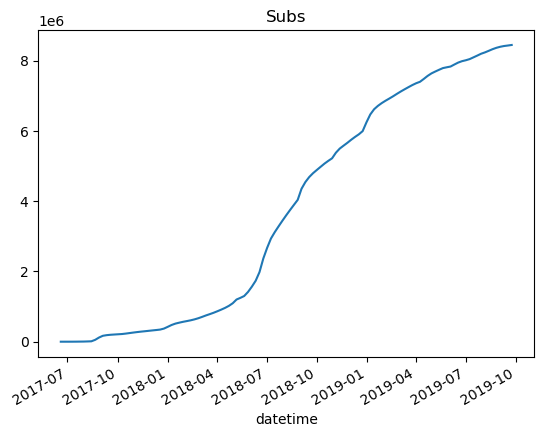

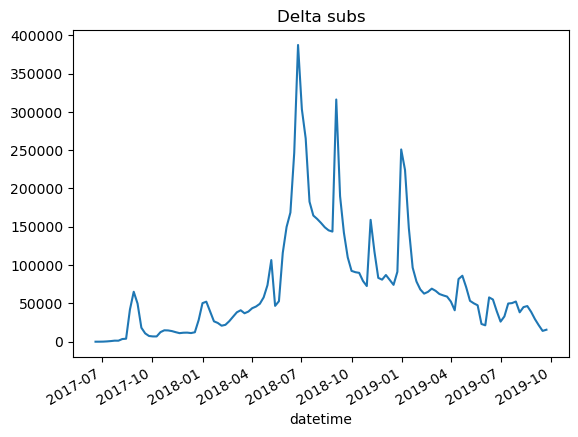

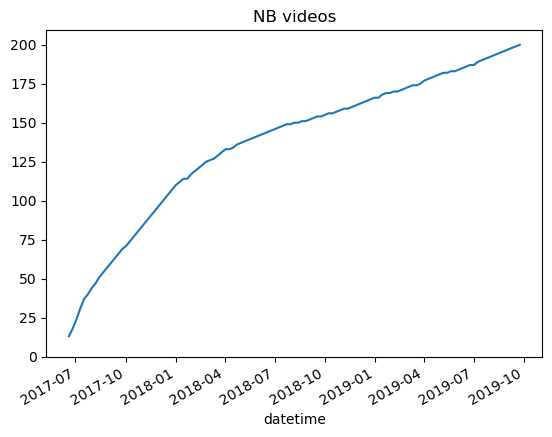

In [8]:
ytb = ent_timeseries[ent_timeseries.channel == 'UC78cxCAcp7JfQPgKxYdyGrg'].set_index('datetime')

# subs evolution
ytb['subs'].plot()
plt.title('Subs')
plt.show()

# subs gain evolution
ytb['delta_subs'].plot()
plt.title('Delta subs')
plt.show()

# nb videos evolution 
ytb['videos'].plot()
plt.title('NB videos')
plt.ylim(bottom=0)

plt.show()


***
# Analysis parameter 
Let's add these informations on each videos from metadata
- `numwords` : number of words in the title 
- `num_capital_word`: number of words in capital letter in title
- `is_capital_title` : 1 if there is more than 2 words in capital letter in the title, 0 otherwise
- `feat` : 1 if the title contains a a word in the list of `featuring_wordsets`, 0 otherwise
- `is_tags` : 1 if the video has tags, 0 otherwise
- `numtags` : the number of tags used in the video
- `pronouns` : 1 if they used pronouns in the title, 0 otherwise (for each pronoun)
- `positive` : 1 if they used positive words in the title, 0 otherwise 
- `negative` : 1 if they used negative words in the title, 0 otherwise


##### NUMWORDS

In [11]:
#counts the number of words in a string
def count_words_simple(string):
    return len(string.split(" "))
    
#drop nan titles
ent_metadata = ent_metadata.dropna(subset=['title'])

#numwords in title
ent_metadata['numwords'] = ent_metadata["title"].apply(count_words_simple)

##### CAPITAL TITLE

In [12]:
#number of capital words in title
ent_metadata['num_capital_word'] = ent_metadata["title"].apply(lambda x : sum(map(str.isupper, x.split())))

#capital title if 2 or more words are capital
ent_metadata['is_capital_title'] = (ent_metadata.num_capital_word >= 2).astype(int)

##### FEATURINGS

In [13]:
#featuring 
featuring_wordsets = ['ft', 'ft.', 'feat.', 'feat', 'featuring', 'collab']

# is_in_string is a fuction returning 1 if a word from a wordlist is in a string, 0 otherwise
def is_in_string (string, wordlist):
    return any(word in string.lower().split(' ') for word in wordlist) * 1

ent_metadata['feat'] = ent_metadata['title'].apply(is_in_string, args=[featuring_wordsets])

##### NUMBER OF TAGS

In [14]:
# counts number of tags splitted by ","
def count_tags(string):
    return len(str(string).split(","))

# is there a tag ?
ent_metadata['is_tags'] = 1 - (ent_metadata['tags'].isna())*1

# number of tags
ent_metadata['numtags'] = ent_metadata["tags"].apply(count_tags) * ent_metadata['is_tags']


##### MOST USED TAGS

In [16]:
def most_used_tags(channel):
    return ",".join(np.array(Counter(' '.join(ent_metadata[(ent_metadata.is_tags==1) & (ent_metadata.channel==channel)]["tags"]) \
                                        .lower() \
                                        .split(',')) \
                                        .most_common(15))[:,0])

ent_channels['most_used_tags'] = ent_channels.channel.apply(most_used_tags)

##### USE OF PRONOUNS

In [15]:
feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])


# is_in_string is a fuction returning 1 if a word from a wordlist is in a string, 0 otherwise
def is_in_string (string, wordlist):
    return any(word in wordlist for word in string.lower().split(' ')) * 1

# We are going through each personnal pronouns and check if a word from its list is in each headline
list_pronouns = feature_wordsets.keys()
for pronoun in list_pronouns:
    ent_metadata[pronoun] = ent_metadata['title'].apply(is_in_string, args=[feature_wordsets[pronoun]])
    


##### USE OF POSITIVE AND NEGATIVE WORDS

In [17]:
# We are doing the same thing as before, but with a longer list of positive/negative words

# Open the list of positive words from a text file from internet, storing it in a dataframe with one column "words"
pos_words = pd.read_csv('https://ptrckprry.com/course/ssd/data/positive-words.txt', comment=';',
                        header=None).rename(columns={0: 'words'})
# Cheking if there are positive words in each headline
ent_metadata['positive'] = ent_metadata['title'].apply(is_in_string, args=[pos_words.words.values])


# Repeating the process with negative words
neg_words = pd.read_csv('https://ptrckprry.com/course/ssd/data/negative-words.txt', comment=';',
                        header=None, encoding = "ISO-8859-1").rename(columns={0: 'words'})
ent_metadata['negative'] = ent_metadata['title'].apply(is_in_string, args=[neg_words.words.values])


***
# Compute the mean of all features by channel


##### Compute all means then merge on channel

In [18]:
ent_channels = pd.merge(ent_channels,
                        ent_metadata.groupby('channel').mean()[['duration','numtags','is_capital_title','numwords','feat','is_tags','view_count','first_person_singular','first_person_plural','second_person','third_person_singular','third_person_plural','positive','negative']],
                        on = 'channel')
ent_channels = pd.merge(ent_channels,
                        ent_timeseries.groupby('channel').mean()[['delta_videos']], 
                        on = 'channel')

##### Rename columns

In [19]:
ent_channels.rename(columns={'duration':'mean_duration', 
                             'numtags':'mean_numtags', 
                             'is_capital_title':'mean_capital_title',
                             'numwords':'mean_numwords',
                             'feat':'mean_feats', 
                             'is_tags':'mean_is_tags',
                             'view_count':'mean_view_count',
                             'delta_videos':'week_freq',
                             'first_person_singular' : 'mean_first_person_singular',
                             'first_person_plural' : 'mean_first_person_plural',
                             'second_person' :  'mean_second_person',
                             'third_person_singular' : 'mean_third_person_singular',
                             'third_person_plural' : 'mean_third_person_plural',
                             'positive' : 'mean_positive',
                             'negative' : 'mean_negative'
                             }, inplace=True)

all_video_parameters = ['duration','numtags','is_capital_title','numwords','feat','is_tags','first_person_singular','first_person_plural','second_person','third_person_singular','third_person_plural','positive','negative']
all_channel_parameters = ['mean_duration','mean_numtags','mean_capital_title','mean_numwords','mean_feats','mean_is_tags','week_freq','mean_first_person_singular','mean_first_person_plural','mean_second_person','mean_third_person_singular','mean_third_person_plural','mean_positive','mean_negative']

***
# Checkpoint - Save the new dataframes

In [20]:
WRITE_CHANNELS_PATH   = DIR + 'ent_channels_param.tsv.zip'
WRITE_TIMESERIES_PATH = DIR + 'ent_timeseries_param.tsv.zip'
WRITE_METADATA_PATH   = DIR + 'ent_metadata_param.tsv.zip'

##### CHANNELS

In [21]:
ent_channels.to_csv(WRITE_CHANNELS_PATH, index=False, compression={'method':'zip'})
ent_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,last_date,last_subs,...,mean_is_tags,mean_view_count,mean_first_person_singular,mean_first_person_plural,mean_second_person,mean_third_person_singular,mean_third_person_plural,mean_positive,mean_negative,week_freq
0,Entertainment,2015-05-12,UCk8GzjMOrta8yxDcKfylJYw,✿ Kids Diana Show,34700000,599,16.0,2.0870,2019-09-30 00:00:00,3.501429e+07,...,0.995017,2.294375e+07,0.018272,0.001661,0.003322,0.011628,0.000000,0.131229,0.196013,2.147436
1,Entertainment,2015-08-29,UCG8rbF3g2AMX70yOd8vqIZg,Logan Paul Vlogs,19800000,645,136.0,2.0870,2019-09-30 00:00:00,1.980000e+07,...,0.993671,7.348556e+06,0.408228,0.115506,0.025316,0.061709,0.015823,0.083861,0.197785,3.898089
2,Entertainment,2015-03-17,UChGJGhZ9SOOHvBB0Y4DOO_w,Ryan ToysReview,21600000,1512,95.0,2.0870,2019-09-30 00:00:00,2.170000e+07,...,1.000000,2.194346e+07,0.009868,0.017105,0.013816,0.015789,0.000000,0.249342,0.307237,6.587097
3,Entertainment,2014-05-13,UCKqx9r4mrFglauNBJc1L_eg,[토이푸딩] ToyPu...,25600000,2851,80.0,2.0870,2019-09-30 00:00:00,2.560000e+07,...,0.586949,5.154037e+06,0.000694,0.000000,0.000000,0.000000,0.000000,0.102048,0.023950,11.477419
4,Entertainment,2017-09-04,UCq8KR1lnewd5ZPx9_XKoubg,Johny FamilyShow,9250944,209,628.0,2.0870,2019-09-30 00:00:00,9.240000e+06,...,1.000000,1.562641e+07,0.009479,0.000000,0.142180,0.009479,0.000000,0.061611,0.146919,1.990476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,Entertainment,2007-07-26,UCiHMMP-b6B1vM-Apsa0wZQQ,Beatriz Mariano,19149,42,564620.0,8.2880,2016-06-27 00:00:00,2.091125e+03,...,1.000000,1.522430e+04,0.113636,0.000000,0.000000,0.000000,0.000000,0.090909,0.204545,0.285714
6728,Entertainment,2019-01-21,UCIDCS0M6EVLtjN8jtnkXNAg,Amberri,29200,17,385849.0,6.6470,2019-05-27 01:00:00,3.978241e+01,...,0.944444,9.007856e+04,0.166667,0.000000,0.111111,0.000000,0.000000,0.111111,0.222222,0.000000
6729,Entertainment,2011-09-20,UCqtco3r7CJQ2n4Y9j4hTL9Q,Salil Jamdar & Co.,374069,14,45282.0,3.3295,2018-01-07 23:00:00,5.797235e+02,...,1.000000,8.154671e+05,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.461538,0.000000
6730,Entertainment,2015-07-21,UCH6PcEuNFkEUkbVTAdvWmFQ,BLORANGETIGER,12800,123,626098.0,11.1550,2017-07-03 00:00:00,1.140000e+02,...,0.992126,5.844772e+03,0.173228,0.007874,0.055118,0.062992,0.047244,0.133858,0.173228,0.000000


##### TIMESERIES

In [22]:
ent_timeseries.to_csv(WRITE_TIMESERIES_PATH, index=False, compression={'method':'zip'})
ent_timeseries

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,has_buzzed
0,UCCBg60LfTbGQLa60A_IJP0A,Entertainment,2016-03-14 00:00:00,4.510483e+06,1.477933e+04,1.105900e+04,0.000000,100,0,0,0
1,UCCBg60LfTbGQLa60A_IJP0A,Entertainment,2016-03-21 00:00:00,4.544995e+06,3.451197e+04,1.111703e+04,58.031414,100,0,0,0
2,UCCBg60LfTbGQLa60A_IJP0A,Entertainment,2016-03-28 01:00:00,4.579649e+06,3.465389e+04,1.115918e+04,42.144512,100,0,0,0
3,UCCBg60LfTbGQLa60A_IJP0A,Entertainment,2016-04-04 01:00:00,4.611097e+06,3.144789e+04,1.118873e+04,29.555556,101,1,1,0
4,UCCBg60LfTbGQLa60A_IJP0A,Entertainment,2016-04-11 01:00:00,4.635242e+06,2.414538e+04,1.122662e+04,37.888310,101,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
965195,UCY6Ij8zOds0WJEeqCLOnqOQ,Entertainment,2019-09-02 00:00:00,1.519259e+08,4.517518e+06,1.535577e+06,31061.875000,164,1,2,1
965196,UCY6Ij8zOds0WJEeqCLOnqOQ,Entertainment,2019-09-09 00:00:00,1.554422e+08,3.516317e+06,1.558057e+06,22479.625000,165,1,2,1
965197,UCY6Ij8zOds0WJEeqCLOnqOQ,Entertainment,2019-09-16 00:00:00,1.582264e+08,2.784177e+06,1.568507e+06,10450.125000,166,1,2,1
965198,UCY6Ij8zOds0WJEeqCLOnqOQ,Entertainment,2019-09-23 00:00:00,1.617288e+08,3.502370e+06,1.592500e+06,23992.875000,167,1,2,1


##### METADATA

In [23]:
ent_metadata.to_csv(WRITE_METADATA_PATH, index=False, compression={'method':'zip'})
ent_metadata

,channel,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,has_buzzed,...,feat,is_tags,numtags,first_person_singular,first_person_plural,second_person,third_person_singular,third_person_plural,positive,negative
0,UCzzgEOi0xR9SuflkXmTQv6g,1.0,22JnX-c9vKA,226,2.0,"andy,grant,strike,out,italo,disco,hi,nrg,eurod...",Andy Grant - Strike Out (1988),2019-07-16,94.0,0,...,0,1,14,0,0,0,0,0,0,1
1,UCzzgEOi0xR9SuflkXmTQv6g,2.0,DdigTYiAceg,278,11.0,"smike,musical,smike!,in the warm light of a br...",Smike! - Matthew Paddon & the Kids from Dotheb...,2018-02-16,731.0,0,...,0,1,8,0,0,0,0,0,1,0
2,UCzzgEOi0xR9SuflkXmTQv6g,18.0,0Z-qKSJOGw4,142,818.0,"charlie,chocolate,factory,west end,blue,peter,...",Charlie and the Chocolate Factory the musical ...,2016-09-18,170703.0,0,...,0,1,21,0,0,0,0,0,0,0
3,UCzzgEOi0xR9SuflkXmTQv6g,10.0,_1Ujr49QZZ8,159,173.0,"matilda,musical,west end,bbc,one show,revoltin...",Matilda the Musical on the BBC One Show,2016-09-12,35347.0,0,...,0,1,9,0,0,0,0,0,0,0
4,UCzzgEOi0xR9SuflkXmTQv6g,10.0,ZFczOr5nAb8,280,402.0,"charlie,chocolate,factory,musical,west,end,lon...",All the Charlie Buckets on 'Tonight at the Lon...,2016-06-08,76576.0,0,...,0,1,35,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393155,UC-04opG9zmAFWfAa-vRBlhA,1.0,3mqUXabUDZo,77,29.0,"stance,stance socks,nick garcia,jason jessee,s...",STANCE MEN'S SPRING 2013 VIDEO LOOKBOOK,2013-02-13,4336.0,0,...,0,1,7,0,0,0,0,0,0,0
5393156,UC-04opG9zmAFWfAa-vRBlhA,0.0,DmzkskaZO-I,67,52.0,"stance,socks,fall 2012,release",STANCE Fall 2012 Sock Release,2012-07-02,9059.0,0,...,0,1,4,0,0,0,0,0,0,1
5393157,UC-04opG9zmAFWfAa-vRBlhA,0.0,3NAZfbUPCmc,94,43.0,"stance,socks,spring,2012,uncommon thread",Stance Spring 2012 Sock Line Release - The Unc...,2012-02-16,7796.0,0,...,0,1,5,0,0,0,0,0,0,0
5393158,UC-04opG9zmAFWfAa-vRBlhA,0.0,NdyMnGE7i-0,28,2.0,"mitch abshere,captain fin co,surfing,fins,priz...",Mitch Abshere Prize Pack,2011-08-02,1045.0,0,...,0,1,15,0,0,0,0,0,1,0


# Checkpoint - Load the dataframes

In [11]:
DIR = "../data/"
READ_CHANNELS_PATH   = DIR + 'ent_channels_param.tsv.zip'
READ_TIMESERIES_PATH = DIR + 'ent_timeseries_param.tsv.zip'
READ_METADATA_PATH   = DIR + 'ent_metadata_param.tsv.zip'

ent_channels = pd.read_csv(READ_CHANNELS_PATH, compression='zip')
ent_channels['join_date'] = pd.to_datetime(ent_channels['join_date'])
ent_channels['last_date'] = pd.to_datetime(ent_channels['last_date'])
ent_channels['period'] = (ent_channels['last_date'] - ent_channels['join_date']).dt.days

ent_timeseries = pd.read_csv(READ_TIMESERIES_PATH, compression='zip')
ent_timeseries['datetime'] = pd.to_datetime(ent_timeseries['datetime'])

ent_metadata = pd.read_csv(READ_METADATA_PATH, compression='zip')
ent_metadata['upload_date'] = pd.to_datetime(ent_metadata['upload_date'])

#recover variables
all_video_parameters = ['duration','numtags','is_capital_title','numwords','feat','is_tags','first_person_singular','first_person_plural','second_person','third_person_singular','third_person_plural','positive','negative']
all_channel_parameters = ['mean_duration','mean_numtags','mean_capital_title','mean_numwords','mean_feats','mean_is_tags','week_freq','mean_first_person_singular','mean_first_person_plural','mean_second_person','mean_third_person_singular','mean_third_person_plural','mean_positive','mean_negative']

*** 
# Come back to our youtuber

##### SPLIT VIDEOS OF OUR YOUTUBER INTO 2 GROUPS : BEFORE AND AFTER BECOMING FAMOUS

In [12]:
ytb = ent_timeseries[ent_timeseries.channel == 'UC78cxCAcp7JfQPgKxYdyGrg'].set_index('datetime')

#our youtuber's videos
ytb_videos = ent_metadata[ent_metadata.channel == 'UC78cxCAcp7JfQPgKxYdyGrg'].copy()

#our youtuber's date where he/she gained the most subscribers
cutoff_date = ytb[ytb.delta_subs == ytb.delta_subs.max()].index.values[0]

#period is 0 before she became famous, 1 after
ytb_videos['period'] = 0 + 1 * (ytb_videos.upload_date >= cutoff_date)

##### DISPLAY THE MEAN OF EACH FEATURE FOR EACH PERIOD AND SEE IF THERE IS A DIFFERENCE

In [13]:
#t_test for each parameter
from scipy import stats
for param in all_video_parameters:
    print(" - ", param)
    print("before: ", ytb_videos[ytb_videos.period == 0][param].mean(), " vs. after: ", ytb_videos[ytb_videos.period == 1][param].mean())
    print("pvalue: ", stats.ttest_ind(ytb_videos[ytb_videos['period']==0][param],
                          ytb_videos[ytb_videos['period']==1][param]).pvalue, "\n")


 -  duration
before:  687.248275862069  vs. after:  903.2105263157895
pvalue:  2.6763651988521344e-07 

 -  numtags
before:  19.137931034482758  vs. after:  5.473684210526316
pvalue:  3.339045735648964e-15 

 -  is_capital_title
before:  0.6  vs. after:  0.9122807017543859
pvalue:  1.138792275138403e-05 

 -  numwords
before:  5.779310344827586  vs. after:  5.7894736842105265
pvalue:  0.9764115504461278 

 -  feat
before:  0.006896551724137931  vs. after:  0.08771929824561403
pvalue:  0.002198475263523924 

 -  is_tags
before:  1.0  vs. after:  1.0
pvalue:  nan 

 -  first_person_singular
before:  0.2482758620689655  vs. after:  0.43859649122807015
pvalue:  0.007848223761300501 

 -  first_person_plural
before:  0.013793103448275862  vs. after:  0.017543859649122806
pvalue:  0.8437280572069661 

 -  second_person
before:  0.06896551724137931  vs. after:  0.017543859649122806
pvalue:  0.1486509051562633 

 -  third_person_singular
before:  0.027586206896551724  vs. after:  0.01754385964

***
# Channel's mean videos parameters analysis

- ### 1. All parameters together

##### RANDOM FOREST
We compute the random forest on the mean of all features by channel. We use the `sklearn` library.


In [14]:
X = ent_channels[all_channel_parameters]
y = ent_channels['has_buzzed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# view the classification report, which contains precision
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.766764,0.794251,0.780252,0.780507,0.780742
recall,0.794562,0.766423,0.780252,0.780493,0.780252
f1-score,0.780415,0.780089,0.780252,0.780252,0.780250
support,662.000000,685.000000,0.780252,1347.000000,1347.000000


##### IMPORTANCE OF FEATURES

In [15]:

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)


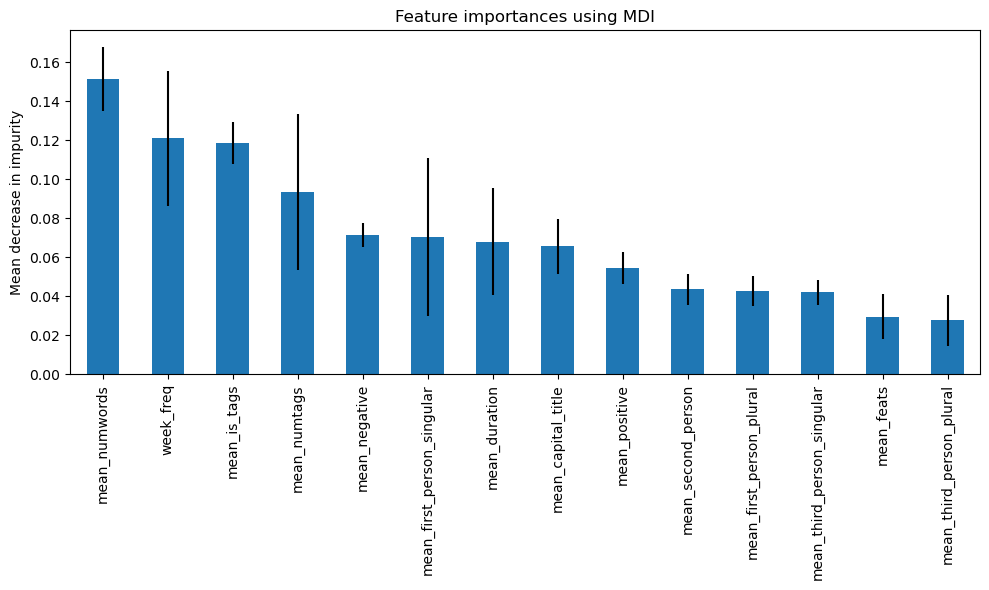

In [16]:

#forest_importances sorted by importance
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
fig , ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


fig_html = go.Figure()
fig_html.add_trace(go.Bar(
    x=forest_importances.index,
    y=forest_importances.values,
    orientation='v',
    marker_color='#15836D' 
))

fig_html.update_layout(
    barmode='group', 
    xaxis_tickangle=-45,
    width=800,
    height=600,
    yaxis_title='Mean decrease in impurity',
    title='Importance of the features for the prediction of a channel\'s buzz',
    template=None,
    showlegend=False)
fig_html.update_yaxes(automargin=True)

fig_html.write_html("../../croquemADAme-datastory/_includes/features_importance.html")

We observe that the most important features are the number of words in the title, the number of tags and the week_freq.

- ### 2. Title only analysis

##### RANDOM FOREST
Same thing as before but we only use the features related to the title.


In [17]:
X = ent_channels[['mean_numwords', 'mean_capital_title', 'mean_first_person_singular', 'mean_first_person_plural', 'mean_second_person', 'mean_third_person_singular', 'mean_third_person_plural', 'mean_positive', 'mean_negative']]
y = ent_channels['has_buzzed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# view the classification report, which contains precision
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.692102,0.758333,0.721604,0.725218,0.725783
recall,0.780967,0.664234,0.721604,0.722600,0.721604
f1-score,0.733854,0.708171,0.721604,0.721013,0.720793
support,662.000000,685.000000,0.721604,1347.000000,1347.000000


In [18]:
importances_title = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

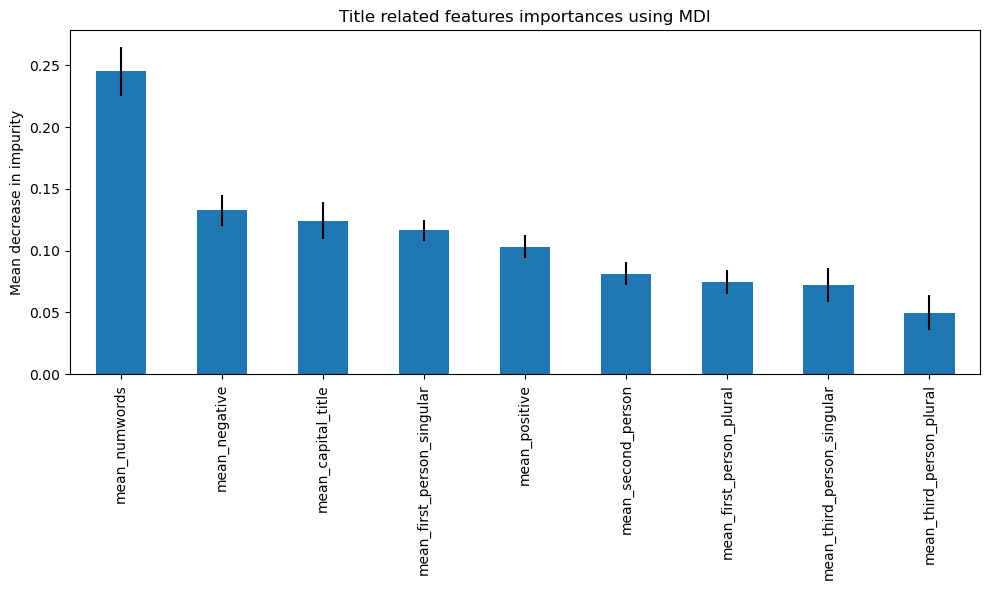

In [19]:
#forest_importances sorted by importance
forest_importances_title = pd.Series(importances_title, index=X.columns).sort_values(ascending=False)
fig , ax = plt.subplots(figsize=(10, 6))
forest_importances_title.plot.bar(yerr=std, ax=ax)
ax.set_title("Title related features importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


fig_html = go.Figure()
fig_html.add_trace(go.Bar(
    x=forest_importances_title.index,
    y=forest_importances_title.values,
    orientation='v',
    marker_color='#15836D' 
))

fig_html.update_layout(
    barmode='group', 
    xaxis_tickangle=-45,
    width=800,
    height=600,
    yaxis_title='Mean decrease in impurity',
    title='Importance of the title related features for the prediction of a channel\'s buzz',
    template=None,
    showlegend=False)
fig_html.update_yaxes(automargin=True)

fig_html.write_html("../../croquemADAme-datastory/_includes/title_features_importance.html")

- ### 3. Mean of parameters

In [20]:
# print the means parameters of the channels that have buzzed
ent_channels[ent_channels['has_buzzed']==1][all_channel_parameters].mean()

mean_duration                 650.077671
mean_numtags                   19.129330
mean_capital_title              0.312064
mean_numwords                  10.244410
mean_feats                      0.017574
mean_is_tags                    0.950407
week_freq                       5.394783
mean_first_person_singular      0.080392
mean_first_person_plural        0.019513
mean_second_person              0.043089
mean_third_person_singular      0.030631
mean_third_person_plural        0.007969
mean_positive                   0.233976
mean_negative                   0.238015
dtype: float64

The best parameters are : 

`mean_numwords` : 10 words in the title

`mean_numtags` : 19 tags used 

`mean_week_freq` : 5 videos per week

`mean_duration` : around 10 minutes

`mean_is_tags` : 0.95 (try to use tags almost all the time)

`mean_feat`: not relevant

`mean_capital_title` : 0.3 (use capital titles 30% of the time)


In [21]:
#print the means parameters of the channels that have not buzzed
ent_channels[ent_channels['has_buzzed']==0][all_channel_parameters].mean()

mean_duration                 552.340015
mean_numtags                   13.181624
mean_capital_title              0.240155
mean_numwords                   7.794029
mean_feats                      0.016937
mean_is_tags                    0.854724
week_freq                       1.328950
mean_first_person_singular      0.076170
mean_first_person_plural        0.012968
mean_second_person              0.038836
mean_third_person_singular      0.023114
mean_third_person_plural        0.003821
mean_positive                   0.174783
mean_negative                   0.165696
dtype: float64

- ### 4. T-test
We compute a t-test on each parameters to see which one has a significant difference between the two classes (buzzing channels and quiet channels )

In [22]:
#t_test for each parameter
from scipy import stats
for param in forest_importances.index.values:
    
    print(" - ", param)
    print("quiet: ", ent_channels[ent_channels['has_buzzed']==0][param].mean(), \
          " vs. buzz: ", ent_channels[ent_channels['has_buzzed']==1][param].mean())
    print("pvalue: ", stats.ttest_ind(ent_channels[ent_channels['has_buzzed']==1][param],
                                      ent_channels[ent_channels['has_buzzed']==0][param]).pvalue, "\n")
                          

 -  mean_numwords
quiet:  7.794029155269366  vs. buzz:  10.244410444040222
pvalue:  7.005996668413825e-256 

 -  week_freq
quiet:  1.3289499332563446  vs. buzz:  5.394783361670651
pvalue:  4.773374609027024e-39 

 -  mean_is_tags
quiet:  0.8547236293935426  vs. buzz:  0.9504072572453138
pvalue:  3.4054630543925794e-79 

 -  mean_numtags
quiet:  13.181624360560939  vs. buzz:  19.129330250948726
pvalue:  3.5317539261813615e-139 

 -  mean_negative
quiet:  0.1656963175729796  vs. buzz:  0.23801539612009268
pvalue:  2.418025558753783e-69 

 -  mean_first_person_singular
quiet:  0.0761696268850212  vs. buzz:  0.08039151841913607
pvalue:  0.12255423113258786 

 -  mean_duration
quiet:  552.3400149783347  vs. buzz:  650.0776706199049
pvalue:  1.8761064303343604e-05 

 -  mean_capital_title
quiet:  0.2401552032987277  vs. buzz:  0.3120638677713504
pvalue:  2.645970710150363e-24 

 -  mean_positive
quiet:  0.17478285469956537  vs. buzz:  0.23397615859729418
pvalue:  1.1619073811195807e-43 

 - 

We can see that the number of words in the title, the week_freq and the number of words in capital letter in the title are the most important features to predict if a channel is buzzing or not.
The rest of the features doesn't seem to be significant to predict if a channel is buzzing or not.

- ### 5. ANOVA tests ?

In [23]:
#run anova test for all parameters

#compute R2
print(r2_score(y_test, y_pred))

stats.f_oneway(ent_channels[ent_channels['has_buzzed']==1][all_channel_parameters],ent_channels[ent_channels['has_buzzed']==0][all_channel_parameters]) 


-0.11391051227203586


F_onewayResult(statistic=array([1.83373990e+01, 6.61242084e+02, 1.04275536e+02, 1.27500453e+03,
       2.42308047e-01, 3.64587275e+02, 1.73072140e+02, 2.38497039e+00,
       4.12881308e+01, 6.50837123e+00, 4.73077293e+01, 6.43810669e+01,
       1.94782553e+02, 3.17061946e+02]), pvalue=array([1.87610643e-005, 3.53175393e-139, 2.64597071e-024, 7.00599667e-256,
       6.22560126e-001, 3.40546305e-079, 4.77337461e-039, 1.22554231e-001,
       1.40339894e-010, 1.07587114e-002, 6.61357642e-012, 1.20056821e-015,
       1.16190738e-043, 2.41802556e-069]))

***
# Linear regressions

##### VIDEO DURATION

In [24]:
#run a linear regression for important parameters
model = smf.ols(formula='mean_duration ~ C(has_buzzed)', data=ent_channels)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          mean_duration   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     18.34
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.88e-05
Time:                        09:58:30   Log-Likelihood:                -55612.
No. Observations:                6732   AIC:                         1.112e+05
Df Residuals:                    6730   BIC:                         1.112e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            552.3400     16

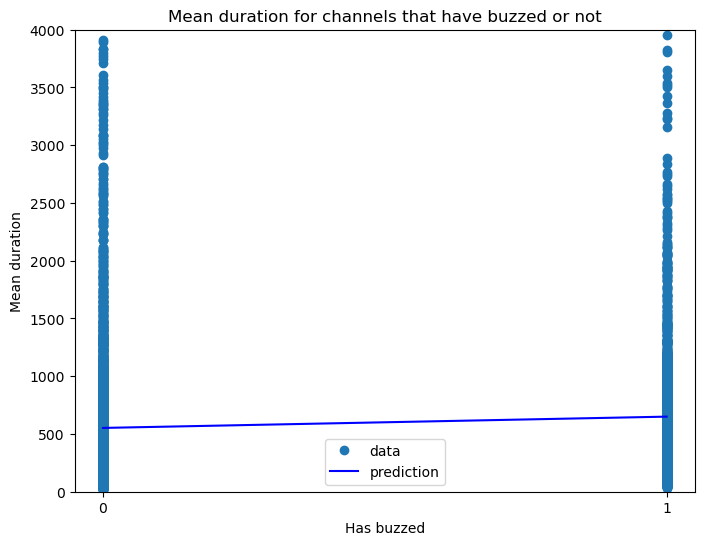

In [25]:
pred_ols = res.fittedvalues
fig, ax = plt.subplots(figsize=(8, 6))

#x is has_buzzed
x = ent_channels['has_buzzed']
#y is mean_duration
y = ent_channels['mean_duration']

ax.plot(x, y, "o", label="data")
ax.plot(x, pred_ols, "b-", label="prediction")
plt.legend()
plt.ylim(0, 4000)
plt.xticks([0, 1])
plt.title("Mean duration for channels that have buzzed or not")
plt.xlabel("Has buzzed")
plt.ylabel("Mean duration")

plt.show()

##### WEEK FREQUENCY

In [26]:
import statsmodels.formula.api as smf
model = smf.ols(formula='week_freq ~ C(has_buzzed)', data=ent_channels)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              week_freq   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     173.1
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           4.77e-39
Time:                        09:58:30   Log-Likelihood:                -26650.
No. Observations:                6732   AIC:                         5.330e+04
Df Residuals:                    6730   BIC:                         5.332e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.3289      0

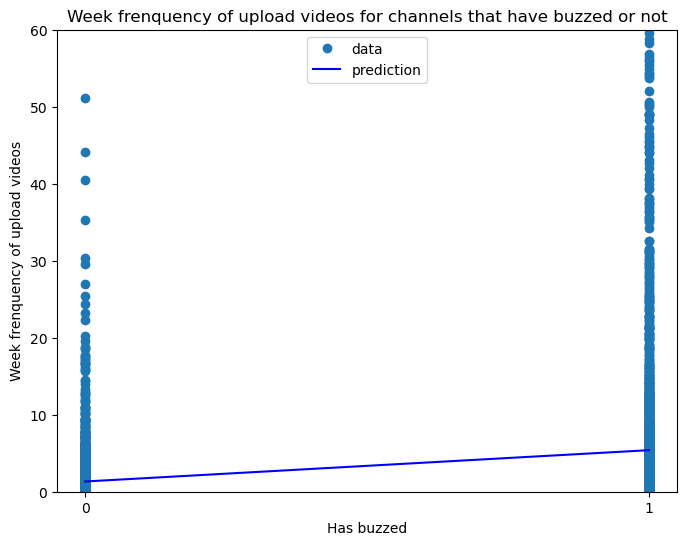

In [27]:
pred_ols = res.fittedvalues
fig, ax = plt.subplots(figsize=(8, 6))

#x is has_buzzed
x = ent_channels['has_buzzed']
#y is mean_duration
y = ent_channels['week_freq']

ax.plot(x, y, "o", label="data")
ax.plot(x, pred_ols, "b-", label="prediction")
plt.legend()
plt.ylim(0, 60)
plt.xticks([0, 1])
plt.title("Week frenquency of upload videos for channels that have buzzed or not")
plt.xlabel("Has buzzed")
plt.ylabel("Week frenquency of upload videos")

plt.show()

Thanks to the linear regression, we can see that the number of videos uploaded in a week by the channel is very affected by the fact that a video buzz or not. Indeed, the more a channel uploads videos in a week, the more the videos are likely to buzz.

##### NUMBER OF WORDS IN TITLE

In [28]:
import statsmodels.formula.api as smf
model = smf.ols(formula='mean_numwords ~ C(has_buzzed)', data=ent_channels)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          mean_numwords   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     1275.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          7.01e-256
Time:                        09:58:30   Log-Likelihood:                -16519.
No. Observations:                6732   AIC:                         3.304e+04
Df Residuals:                    6730   BIC:                         3.306e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.7940      0

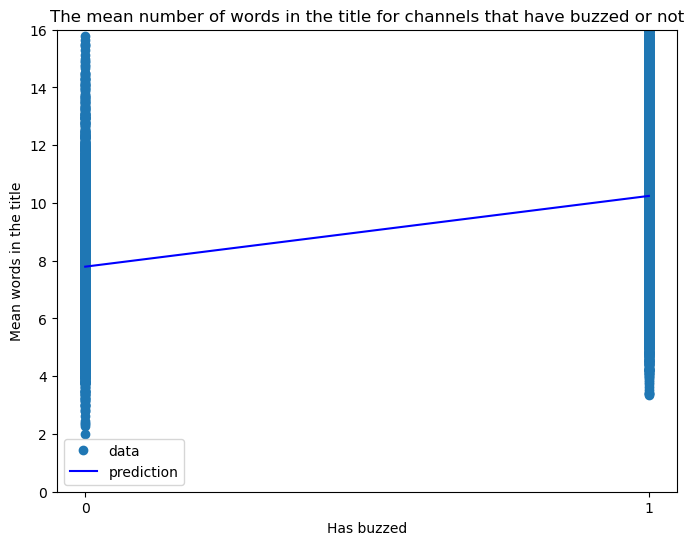

In [29]:
pred_ols = res.fittedvalues
fig, ax = plt.subplots(figsize=(8, 6))

#x is has_buzzed
x = ent_channels['has_buzzed']
#y is mean_duration
y = ent_channels['mean_numwords']

ax.plot(x, y, "o", label="data")
ax.plot(x, pred_ols, "b-", label="prediction")
plt.legend()
plt.ylim(0, 16)
plt.xticks([0, 1])
plt.title("The mean number of words in the title for channels that have buzzed or not")
plt.xlabel("Has buzzed")
plt.ylabel("Mean words in the title")

plt.show()

The number of word in the title is also a good indicator of the buzz of a video. Indeed, the more a video has words in the title, the more the video is likely to buzz. We can see that this number is increased by 30% for the buzzing videos.

***
# Compare most used tags

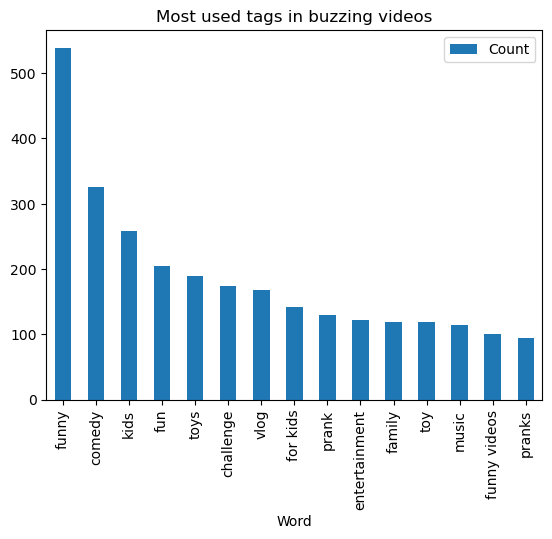

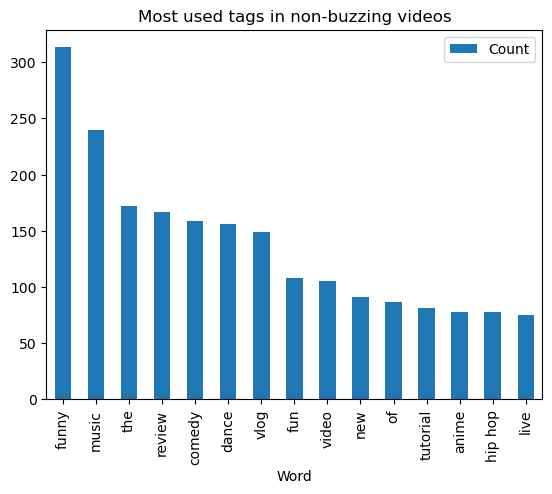

In [30]:
# keep most used tags by buzz channels
buzz_tags = Counter(' '.join(ent_channels[(ent_channels.mean_is_tags!=0) & (ent_channels.has_buzzed==1)]["most_used_tags"]).split(',')).most_common(15)

# plot the most used tags by buzz channels
pd.DataFrame(buzz_tags, columns = ['Word', 'Count']).plot.bar(x='Word',y='Count')
plt.title("Most used tags in buzzing videos")
plt.savefig("../output/tags_buzz.png", dpi = 500)

# keep most used tags by quiet channels
quiet_tags = Counter(' '.join(ent_channels[(ent_channels.mean_is_tags!=0) & (ent_channels.has_buzzed==0)]["most_used_tags"]).split(',')).most_common(15)
# plot the most used tags by quiet channels
pd.DataFrame(quiet_tags, columns = ['Word', 'Count']).plot.bar(x='Word',y='Count')
plt.title("Most used tags in non-buzzing videos")
plt.savefig("../output/tags_quiet.png", dpi = 500)
plt.show()

***
# Boxplot

We computed boxplot for each parameter for channels that have buzzed or not

<Figure size 1000x700 with 0 Axes>

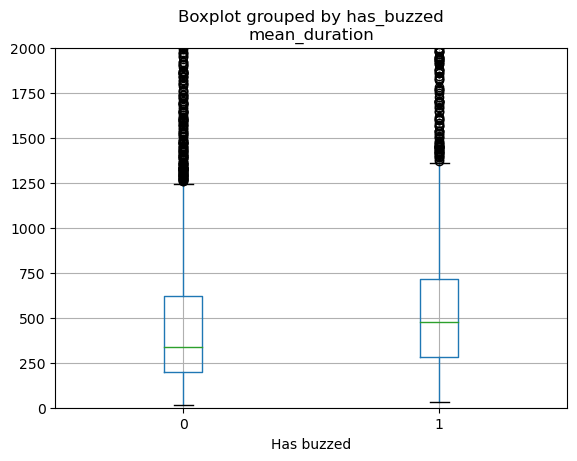

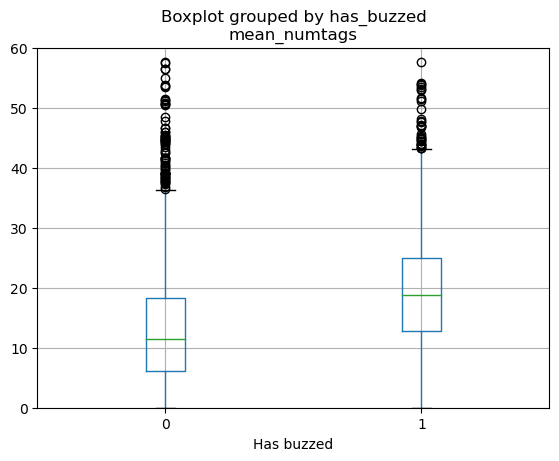

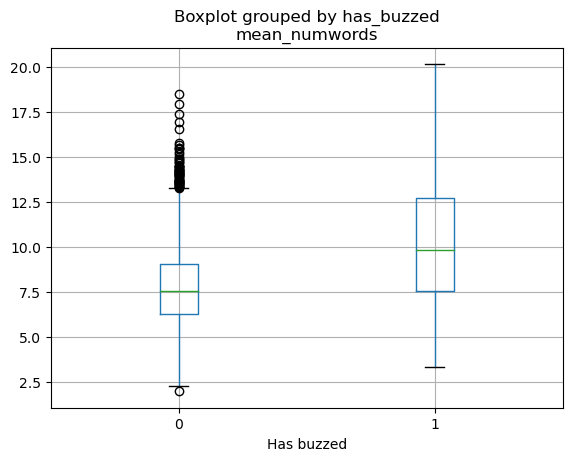

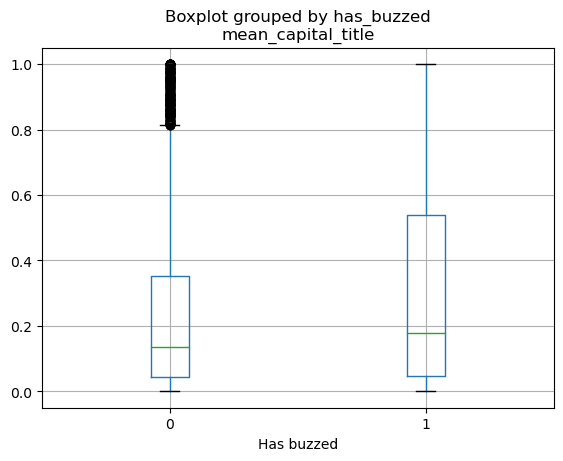

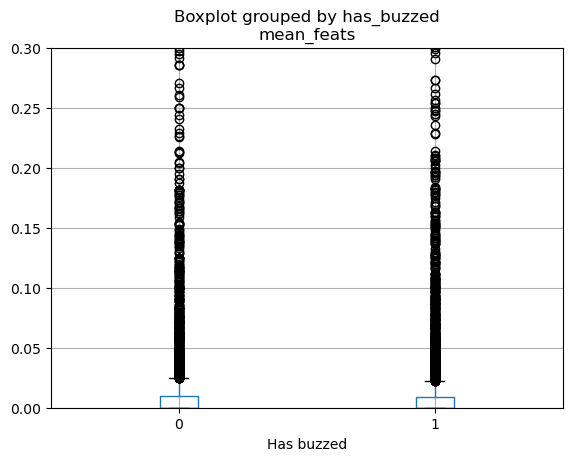

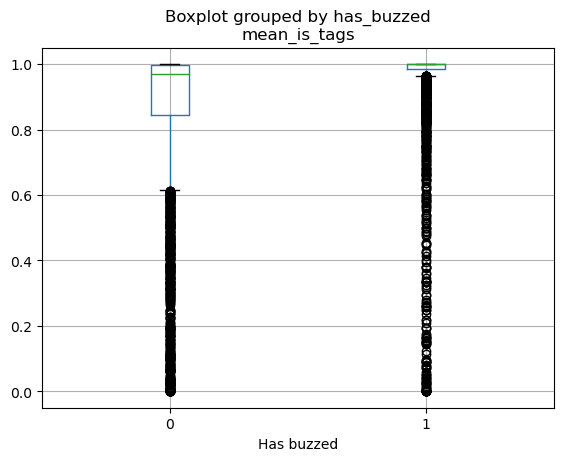

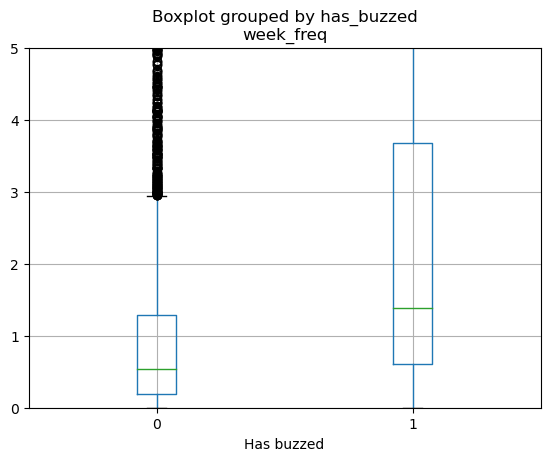

In [31]:
fig = plt.figure(figsize =(10, 7))
#boxplot for each parameter for channels that have buzzed or not

bp1 = ent_channels.boxplot(column=['mean_duration'], by=['has_buzzed'])
plt.xlabel('Has buzzed')
plt.ylim([0,2000])

bp2 = ent_channels.boxplot(column=['mean_numtags'], by=['has_buzzed'])
plt.xlabel('Has buzzed')
plt.ylim([0,60])

bp3 = ent_channels.boxplot(column=['mean_numwords'], by=['has_buzzed'])
plt.xlabel('Has buzzed')

bp4 = ent_channels.boxplot(column=['mean_capital_title'], by=['has_buzzed'])
plt.xlabel('Has buzzed')

bp5 = ent_channels.boxplot(column=['mean_feats'], by=['has_buzzed'])
plt.xlabel('Has buzzed')
plt.ylim([0,0.3])

bp6 = ent_channels.boxplot(column=['mean_is_tags'], by=['has_buzzed'])
plt.xlabel('Has buzzed')

bp7 = ent_channels.boxplot(column=['week_freq'], by=['has_buzzed'])
plt.ylim([0,5])
plt.xlabel('Has buzzed')

# show plot
plt.show()

#plot distribution of parameters for channels that have buzzed or not?

***
# Distributions of parameters use

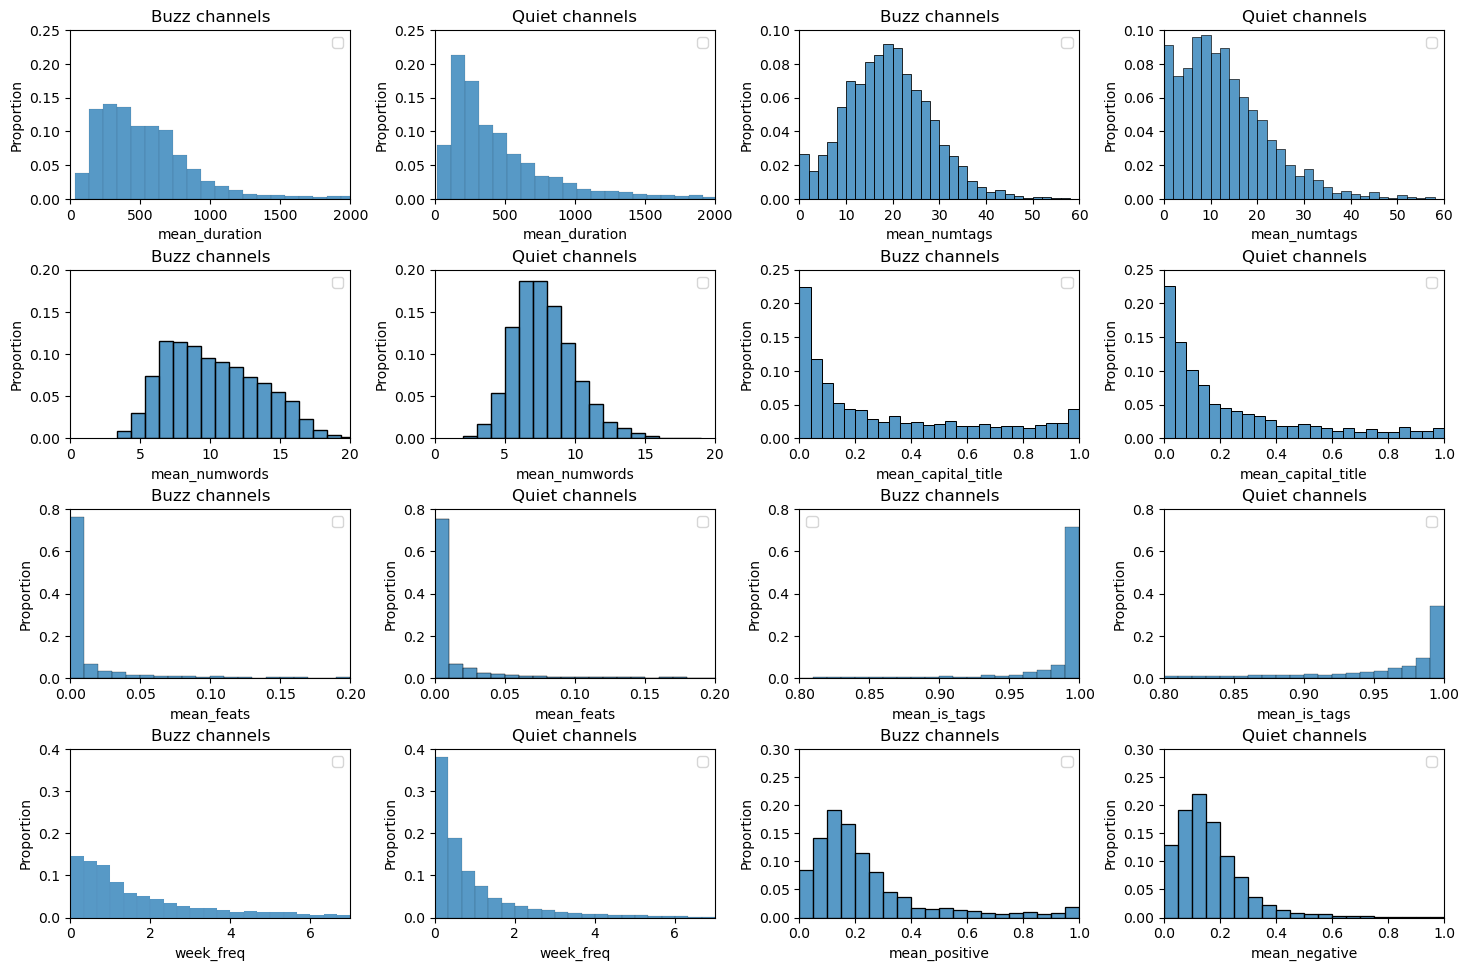

In [32]:

fig, ax = plt.subplots(4,4, figsize=(15, 10))
fig.tight_layout(pad=3.0)

### mean_duration ###

sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_duration'], ax=ax[0,0], stat='proportion', binwidth=100)
ax[0,0].set_title("Buzz channels")
ax[0,0].legend([])
ax[0,0].set_xlim(0,2000)
ax[0,0].set_ylim(0,0.25)

sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_duration'], ax=ax[0,1], stat='proportion', binwidth=100)
ax[0,1].set_title("Quiet channels")
ax[0,1].legend([])
ax[0,1].set_xlim(0,2000)
ax[0,1].set_ylim(0,0.25)

### mean_numtags ###

sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_numtags'], ax=ax[0,2], stat='proportion', binwidth=2)
ax[0,2].set_title("Buzz channels")
ax[0,2].legend([])
ax[0,2].set_xlim(0,60)
ax[0,2].set_ylim(0,0.1)

sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_numtags'], ax=ax[0,3], stat='proportion', binwidth=2)
ax[0,3].set_title("Quiet channels")
ax[0,3].legend([])
ax[0,3].set_xlim(0,60)
ax[0,3].set_ylim(0,0.1)

### mean_numwords ###

sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_numwords'], ax=ax[1,0], stat='proportion', binwidth=1)
ax[1,0].set_title("Buzz channels")
ax[1,0].legend([])
ax[1,0].set_xlim(0,20)
ax[1,0].set_ylim(0,0.2)

sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_numwords'], ax=ax[1,1], stat='proportion', binwidth=1)
ax[1,1].set_title("Quiet channels")
ax[1,1].legend([])
ax[1,1].set_xlim(0,20)
ax[1,1].set_ylim(0,0.2)

### mean_capital_title ###

sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_capital_title'], ax=ax[1,2], stat='proportion', binwidth=0.04)
ax[1,2].set_title("Buzz channels")
ax[1,2].legend([])
ax[1,2].set_xlim(0,1)
ax[1,2].set_ylim(0,0.25)


sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_capital_title'], ax=ax[1,3], stat='proportion', binwidth=0.04)
ax[1,3].set_title("Quiet channels")
ax[1,3].legend([])
ax[1,3].set_xlim(0,1)
ax[1,3].set_ylim(0,0.25)

### mean_feats ###

sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_feats'], ax=ax[2,0], stat='proportion', binwidth=0.01)
ax[2,0].set_title("Buzz channels")
ax[2,0].legend([])
ax[2,0].set_xlim(0,0.2)
ax[2,0].set_ylim(0,0.8)

sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_feats'], ax=ax[2,1], stat='proportion', binwidth=0.01)
ax[2,1].set_title("Quiet channels")
ax[2,1].legend([])
ax[2,1].set_xlim(0,0.2)
ax[2,1].set_ylim(0,0.8)

### mean_is_tags ###

sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_is_tags'], ax=ax[2,2], stat='proportion', binwidth=0.01)
ax[2,2].set_title("Buzz channels")
ax[2,2].legend([])
ax[2,2].set_xlim(0.8,1)
ax[2,2].set_ylim(0,0.8)


sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_is_tags'], ax=ax[2,3], stat='proportion', binwidth=0.01)
ax[2,3].set_title("Quiet channels")
ax[2,3].legend([])
ax[2,3].set_xlim(0.8,1)
ax[2,3].set_ylim(0,0.8)

### week_freq ###

sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['week_freq'], ax=ax[3,0], stat='proportion', binwidth=1/3)
ax[3,0].set_title("Buzz channels")
ax[3,0].legend([])
ax[3,0].set_xlim(0,7)
ax[3,0].set_ylim(0,0.4)

sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['week_freq'], ax=ax[3,1], stat='proportion', binwidth=1/3)
ax[3,1].set_title("Quiet channels")
ax[3,1].legend([])
ax[3,1].set_xlim(0,7)
ax[3,1].set_ylim(0,0.4)

### mean_positive ###

sns.histplot(ent_channels[ent_channels['has_buzzed']==1]['mean_positive'], ax=ax[3,2], stat='proportion', binwidth=0.05)
ax[3,2].set_title("Buzz channels")
ax[3,2].legend([])
ax[3,2].set_xlim(0,1)
ax[3,2].set_ylim(0,0.3)

sns.histplot(ent_channels[ent_channels['has_buzzed']==0]['mean_negative'], ax=ax[3,3], stat='proportion', binwidth=0.05)
ax[3,3].set_title("Quiet channels")
ax[3,3].legend([])
ax[3,3].set_xlim(0,1)
ax[3,3].set_ylim(0,0.3)

plt.show()


***
# Split videos into 2 groups : buzz and quiet

`buzz_videos` : contains all the videos of the channels that have buzzed

`quiet_videos` : contains all the videos of the channels that have not buzzed

In [33]:
buzz_videos = ent_metadata[ent_metadata['has_buzzed']==1]
quiet_videos = ent_metadata[ent_metadata['has_buzzed']==0]

***
# Number of videos uploaded by month

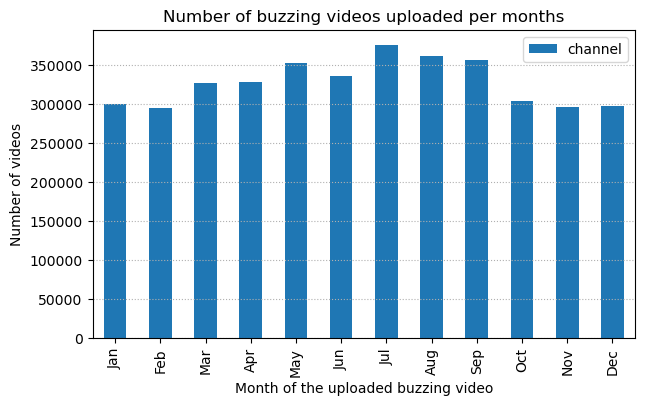

In [34]:
# For the buzzing channels 

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

buzz_videos_perM = buzz_videos.groupby(buzz_videos['upload_date'].dt.month).count()[['channel']]
buzz_videos_perM['months'] = months
buzz_videos_perM.set_index('months', inplace=True)

buzz_videos_perM.plot(kind="bar",figsize=(7,4))
plt.grid(axis='y', ls=':')
plt.title('Number of buzzing videos uploaded per months')
plt.xlabel('Month of the uploaded buzzing video')
plt.ylabel('Number of videos')
plt.savefig("../output/months_buzz.png", dpi = 500)

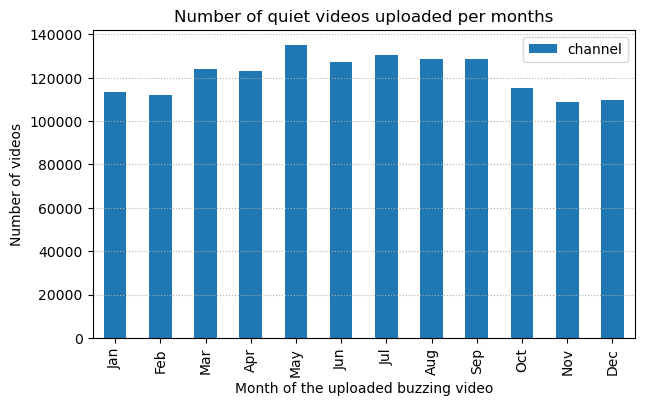

In [35]:
# For the quiet channels
quiet_videos_perM = quiet_videos.groupby(quiet_videos['upload_date'].dt.month).count()[['channel']]
quiet_videos_perM['months'] = months
quiet_videos_perM.set_index('months', inplace=True)

quiet_videos_perM.plot(kind="bar",figsize=(7,4))
plt.grid(axis='y', ls=':')
plt.title('Number of quiet videos uploaded per months')
plt.xlabel('Month of the uploaded buzzing video')
plt.ylabel('Number of videos')
plt.savefig("../output/months_quiet.png", dpi = 500)

We observe no real difference between the two distributions, execpt that there is much less videos posted by quiet channels than by buzzing channels.

***
# Lexical analysis on title 

Empath is a tool for analyzing text across lexical categories (similar to LIWC), and also generating new lexical categories to use for an analysis
We used empath to calutate the frequency of each topic in the title of the videos.

In [36]:
lexicon = Empath()

_Note_:
> We first did a topic analysis on each video without doing the mean by channel. We then did the same analysis on the mean of each channel. We found out that if a channel has a lot more of videos than another one, the analysis will be biased, and the channel with a lot a videos will weigth a lot compare to the channel with less videos. It is then better to do the analysis on the mean of each channel.
> 
> We show both methods in the following cells but we keep the analysis on the mean of each channel for our datastory.

##### 1. MEAN ON VIDEOS

In [37]:
topics_video= []
topics_video.append(lexicon.analyze(buzz_videos['title'].str.cat(sep = ' '), normalize = True))
topics_video.append(lexicon.analyze(quiet_videos['title'].str.cat(sep = ' '), normalize = True))
topics_video = pd.DataFrame(topics_video, index = ['buzzing', 'quiet'])
df_topics = topics_video.copy().transpose()
df_topics.reset_index(inplace=True)

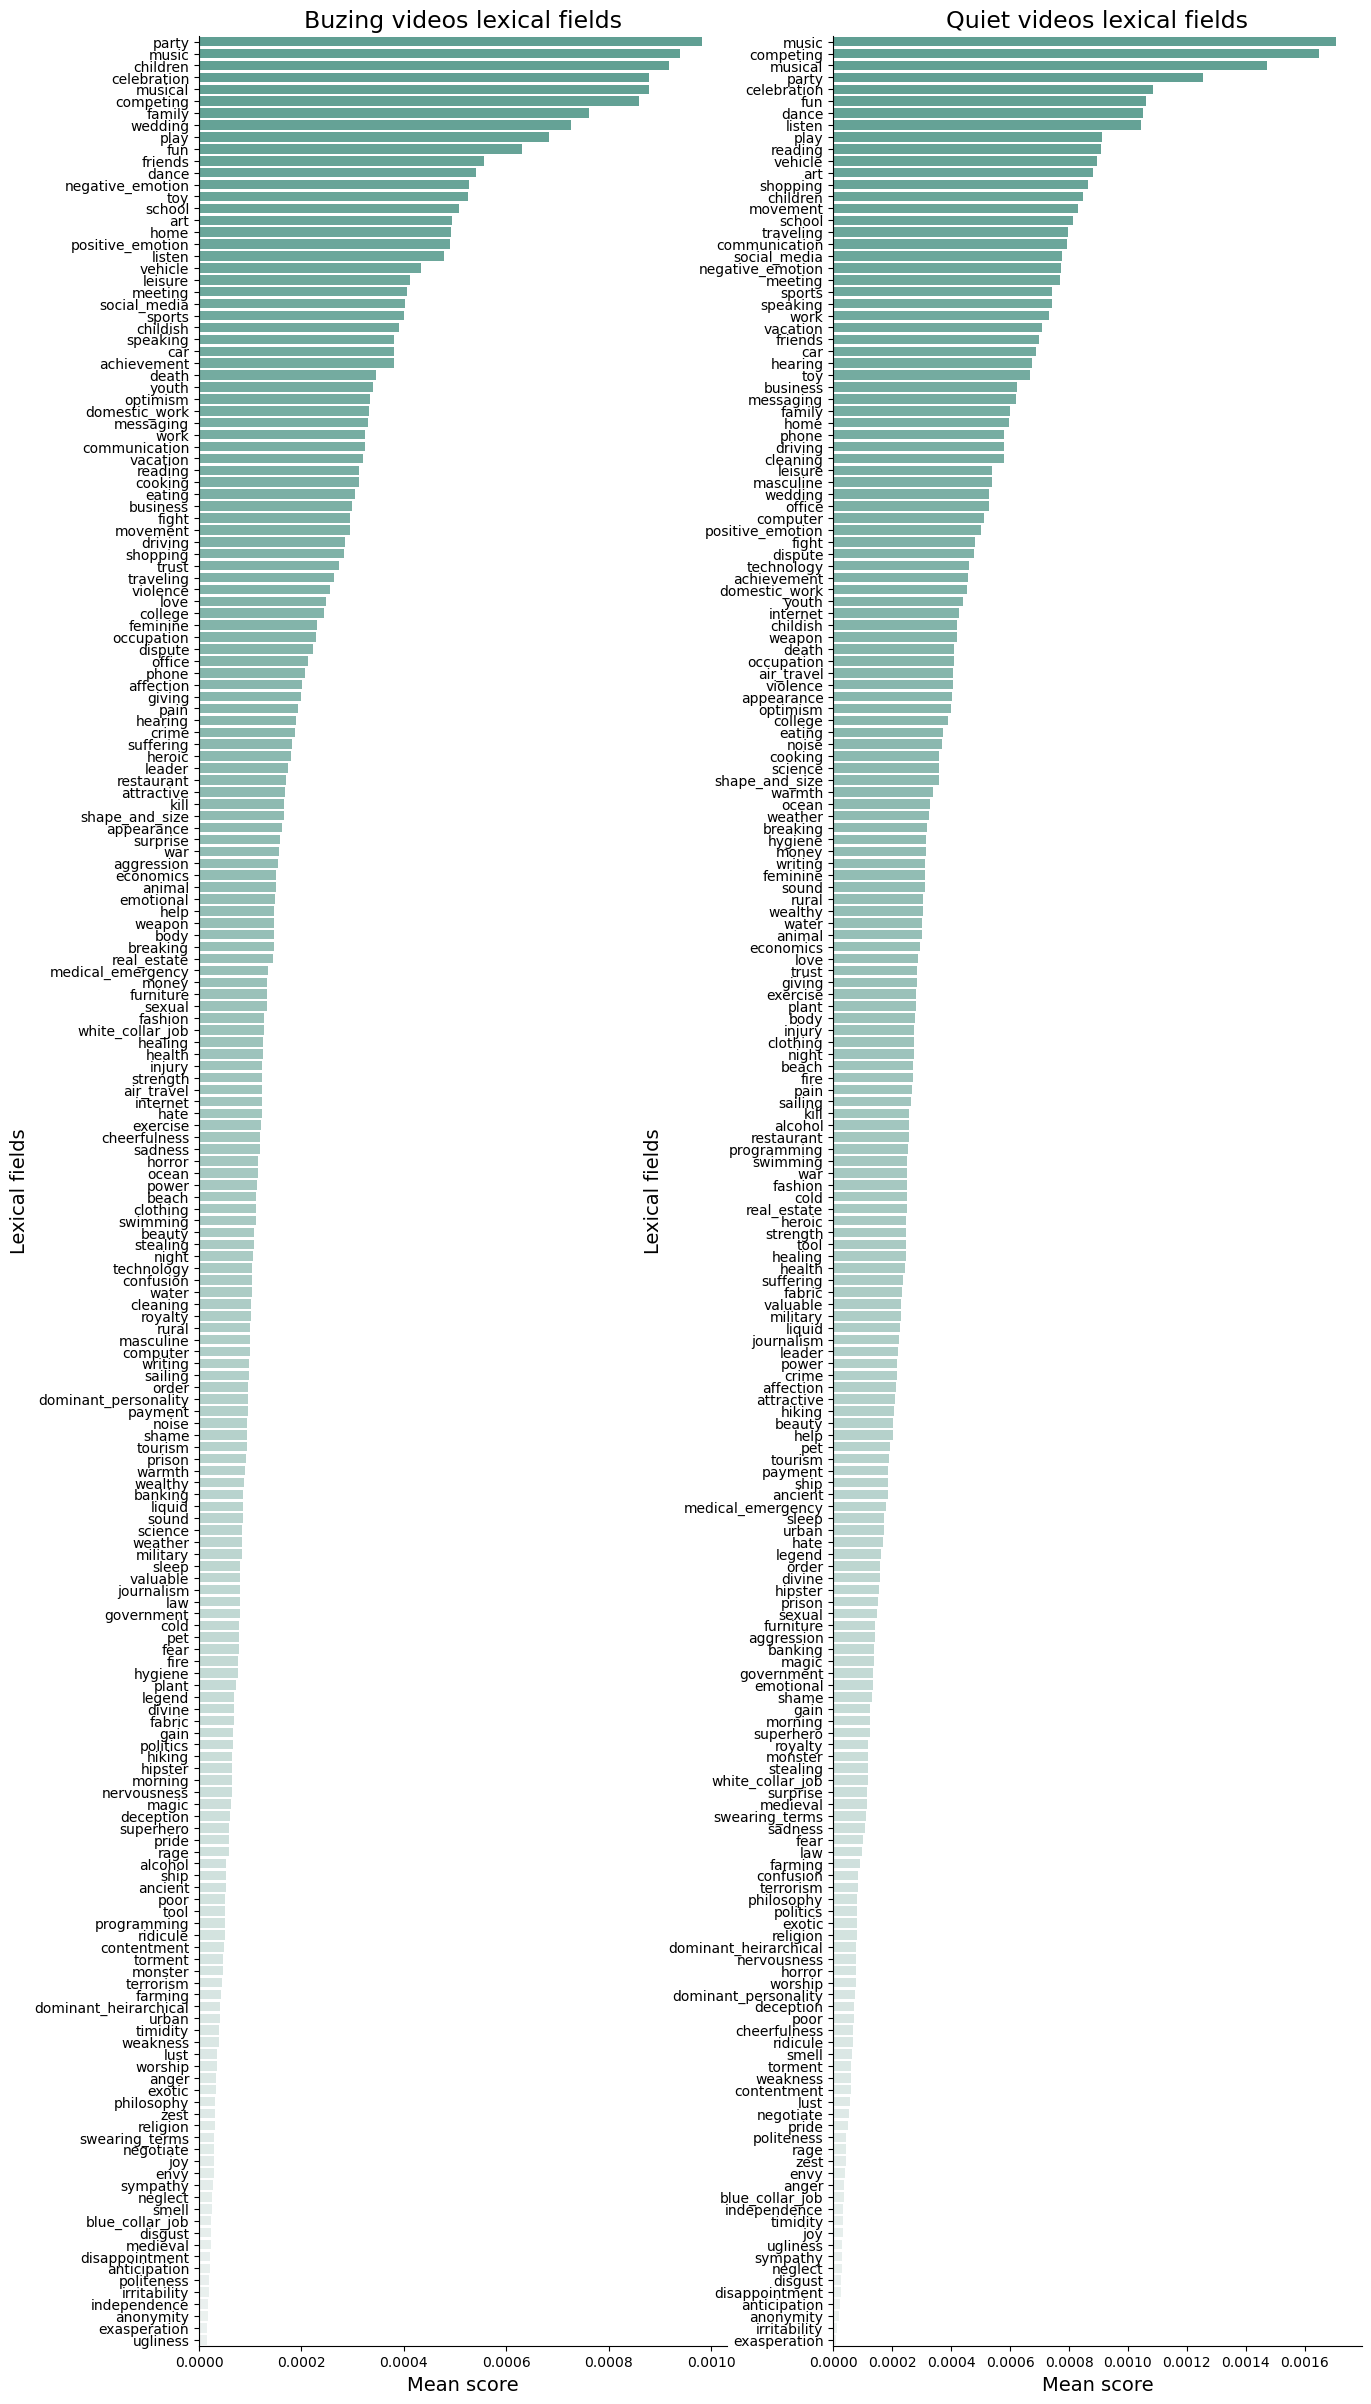

In [38]:
#plot the topics for buzzing and not buzzing videos
fig, ax = plt.subplots(1,2, figsize=(15, 30))

palette = sns.color_palette("light:#5A9", n_colors = len(df_topics))
palette.reverse()

df_topics = df_topics.sort_values(by=['buzzing'],  ascending=False)
sns.barplot(x = 'buzzing', y = 'index', data=df_topics, ax = ax[0], palette = palette)
ax[0].set_title("Buzing videos lexical fields", fontsize = 17)
ax[0].set_xlabel("Mean score", fontsize = 14)
ax[0].set_ylabel("Lexical fields", fontsize = 14)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

df_topics = df_topics.sort_values(by=['quiet'],  ascending=False)
sns.barplot(x = 'quiet', y = 'index', data=df_topics, ax = ax[1], palette = palette)
ax[1].set_title("Quiet videos lexical fields", fontsize = 17)
ax[1].set_xlabel("Mean score", fontsize = 14)
ax[1].set_ylabel("Lexical fields", fontsize = 14)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

##### 2. MEAN ON CHANNELS

We compute the mean topics for each youtuber and then the mean of all youtubers for the buzzing and non buzzing videos. As mentionned before, we keep this analysis on the mean of each channel for our datastory.

In [39]:
#iterate on the channels
topics_buzz = []
k = 0
for channel in buzz_videos.channel.unique():
    k+=1
    print(k, ' / ', len(buzz_videos.channel.unique())) if k%500 == 0 else None
    topics_buzz.append(lexicon.analyze(buzz_videos['title'][buzz_videos.channel==channel].str.cat(sep = ' '), normalize = True))
topics_buzz = pd.DataFrame(topics_buzz, index = buzz_videos.channel.unique())
    
topics_quiet = []
k = 0
for channel in quiet_videos.channel.unique():
    k+=1
    print(k, ' / ', len(quiet_videos.channel.unique())) if k%500 == 0 else None
    topics_quiet.append(lexicon.analyze(quiet_videos['title'][quiet_videos.channel==channel].str.cat(sep = ' '), normalize = True))
topics_quiet = pd.DataFrame(topics_quiet, index = quiet_videos.channel.unique())


500  /  3366
1000  /  3366
1500  /  3366
2000  /  3366
2500  /  3366
3000  /  3366
3500  /  3366
4000  /  3366
4500  /  3366
5000  /  3366
5500  /  3366
6000  /  3366
6500  /  3366


In [40]:
df_topics_buzz = pd.DataFrame(topics_buzz.mean())
df_topics_buzz.columns = ['Buzzing']

df_topics_quiet= pd.DataFrame(topics_quiet.mean())
df_topics_quiet.columns = ['Quiet']

df_topics = pd.concat([df_topics_buzz, df_topics_quiet], axis = 1) #contains the mean of the topics for buzzing and not buzzing videos

In [41]:
df_topics

,Buzzing,Quiet
help,0.000184,0.000225
office,0.000168,0.000430
dance,0.000912,0.001407
money,0.000164,0.000289
wedding,0.000468,0.000523
...,...,...
contentment,0.000055,0.000071
writing,0.000138,0.000370
rural,0.000159,0.000359
positive_emotion,0.000664,0.000736


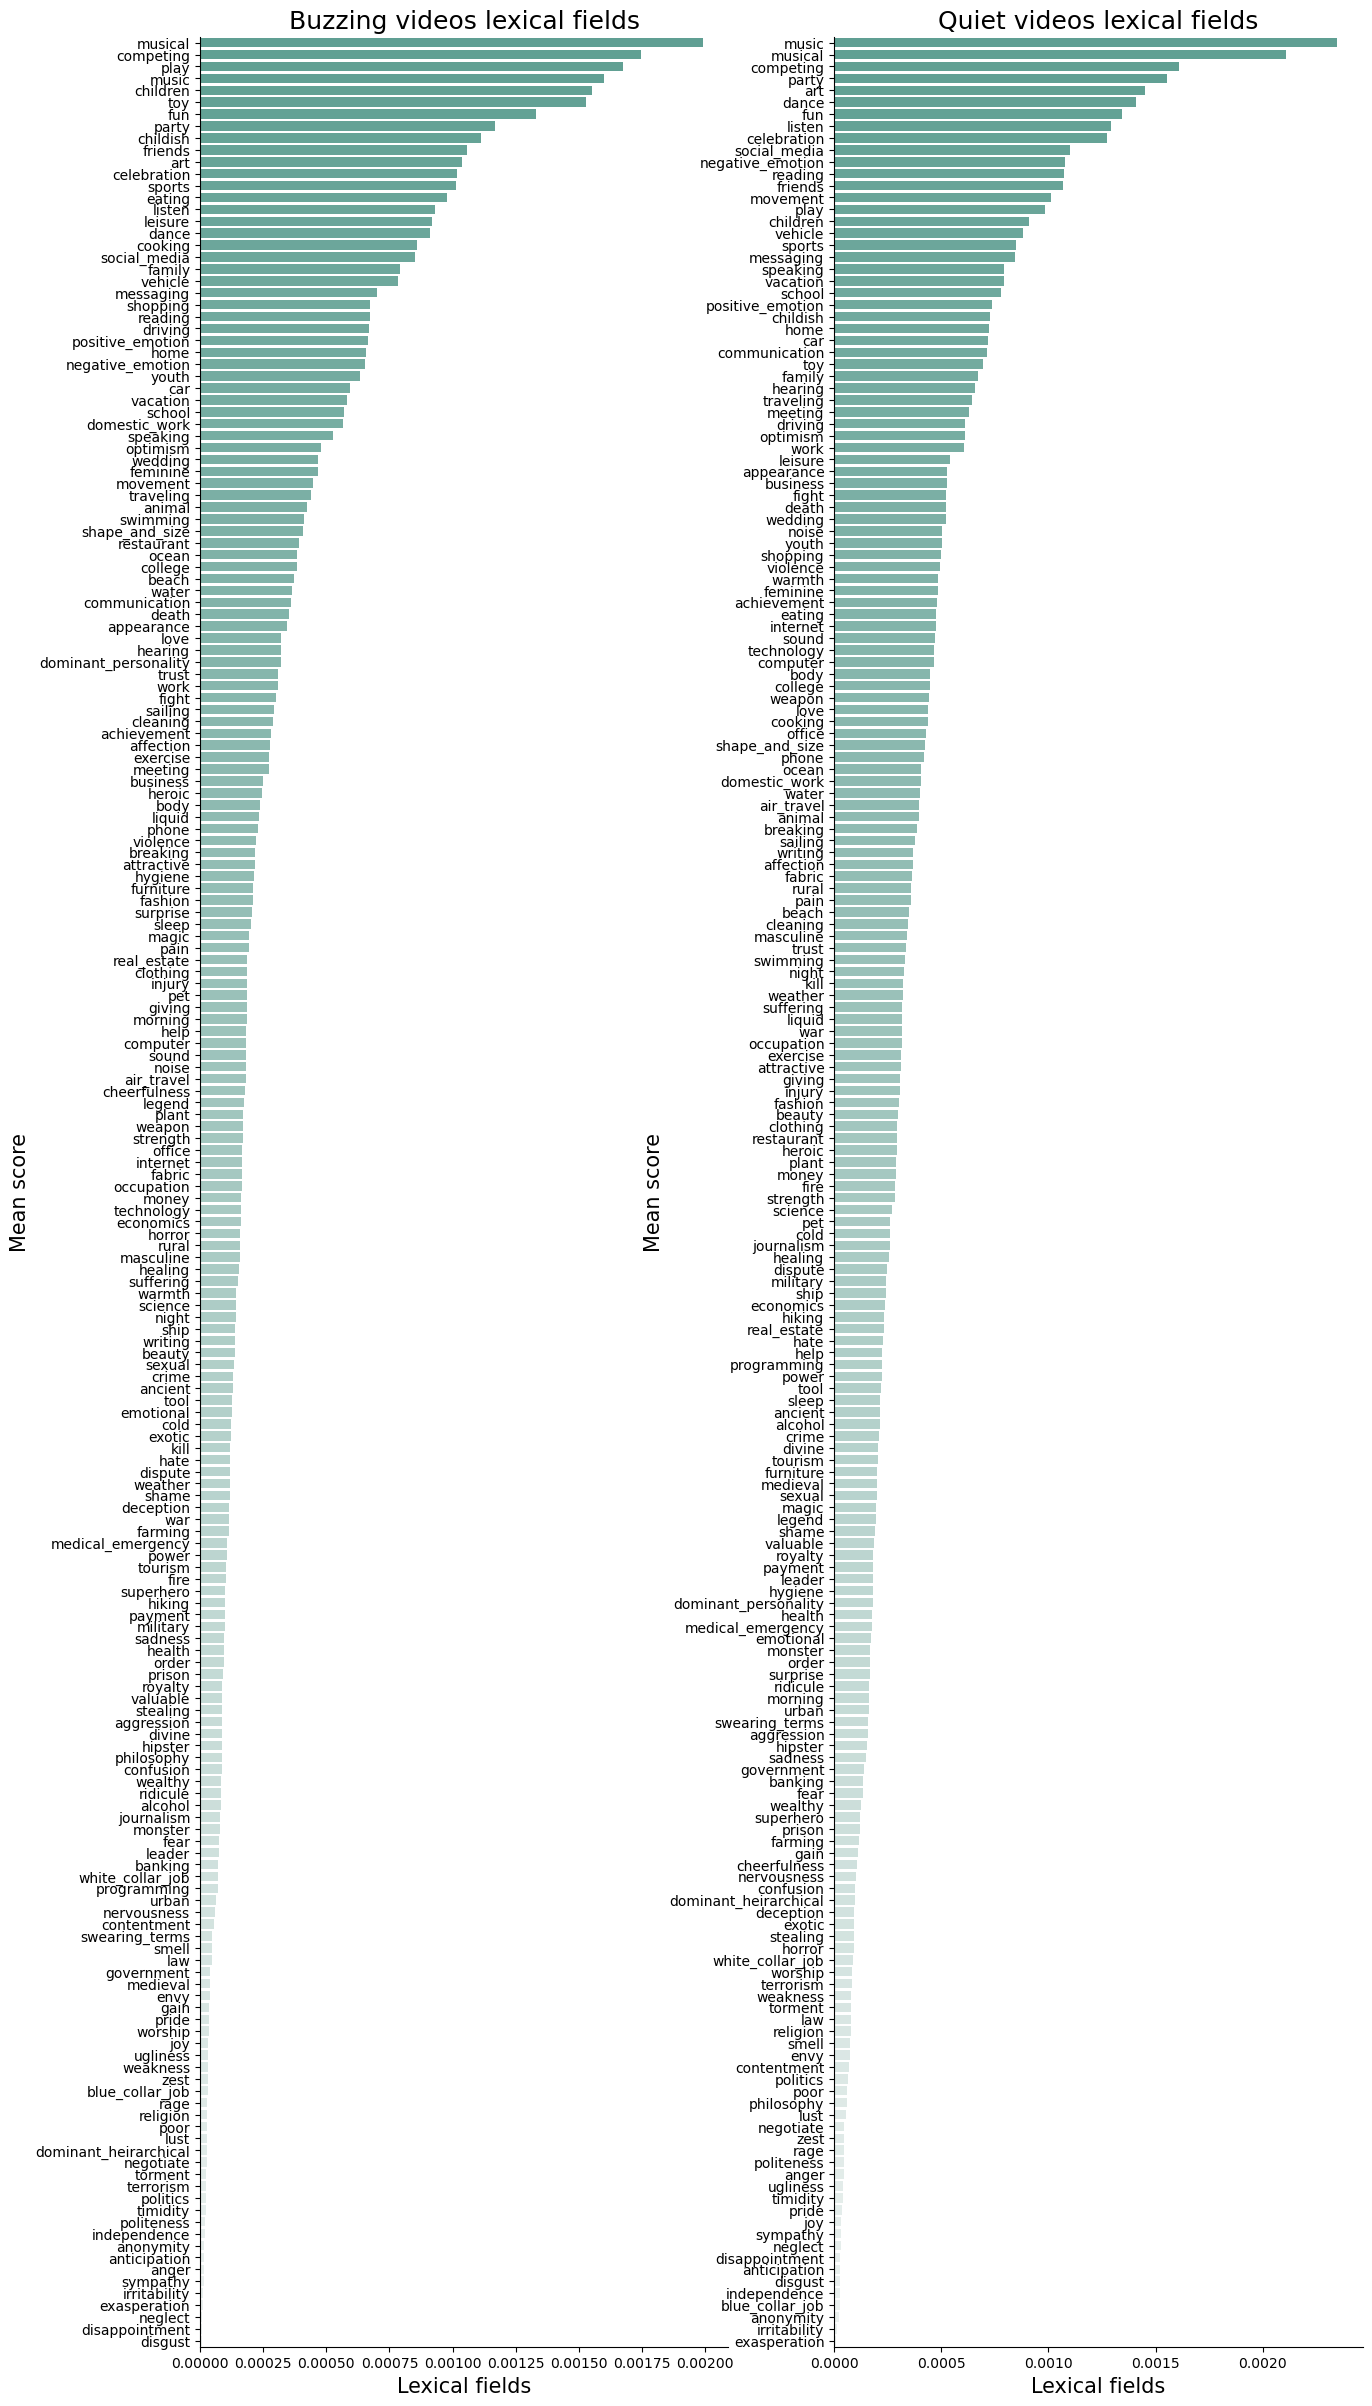

In [42]:
#plot the topics for buzzing and Quiet channels

fig, ax = plt.subplots(1,2, figsize=(15, 30))

palette = sns.color_palette("light:#5A9", n_colors = len(df_topics))
palette.reverse()

df_topics = df_topics.sort_values(by=['Buzzing'],  ascending=False)
sns.barplot(x = 'Buzzing', y = df_topics.index, data=df_topics, ax = ax[0], palette = palette)
ax[0].set_title("Buzzing videos lexical fields", fontsize = 18)
ax[0].set_xlabel("Lexical fields", fontsize = 15)
ax[0].set_ylabel("Mean score", fontsize = 15)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

palette = sns.color_palette("light:#5A9", n_colors = len(df_topics))
palette.reverse()

df_topics = df_topics.sort_values(by=['Quiet'],  ascending=False)
sns.barplot(x = 'Quiet' , y = df_topics.index, data=df_topics, ax = ax[1], palette = palette)
ax[1].set_title("Quiet videos lexical fields", fontsize = 18)
ax[1].set_xlabel("Lexical fields", fontsize = 15)
ax[1].set_ylabel("Mean score", fontsize = 15)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

Exportation of the data for the datastory

In [43]:
#plot for the datastory
fig = go.Figure()
fig.add_trace(go.Bar(
    x = df_topics.sort_values(by=['Buzzing'], ascending=False).index,
    y = df_topics.sort_values(by=['Buzzing'], ascending=False)['Buzzing'],
    orientation='v',
    marker_color='rgb(119, 143, 225)'
))

fig.update_layout(
    barmode='group', 
    xaxis_tickangle=-45,
    width=800,
    height=600,
    xaxis_title='Topics',
    xaxis = dict(rangeslider=dict(visible=True)),
    yaxis_title='Mean score',
    title="Buzz videos lexical fields",
    template=None,
    showlegend=False)
fig.update_yaxes(automargin=True)

fig.write_html("../../croquemADAme-datastory/_includes/buzz_topics.html")

In [44]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = df_topics.sort_values(by=['Quiet'], ascending=False).index,
    y = df_topics.sort_values(by=['Quiet'], ascending=False)['Quiet'],
    orientation='v',
    marker_color = 'rgb(173, 53, 95)'
    
))

fig.update_layout(
    barmode='group', 
    xaxis_tickangle=-45,
    width=800,
    height=600,
    xaxis_title='Topics',
    xaxis = dict(rangeslider=dict(visible=True)),
    yaxis_title='Mean score',
    title="Quiet videos lexical fields",
    template=None,
    showlegend=False)
fig.update_yaxes(automargin=True)

fig.write_html("../../croquemADAme-datastory/_includes/quiet_topics.html")

##### Diagram of venn
We plot the venn diagram of the topics for the buzzing and non buzzing channels.
We wanna see if there is a difference between the topics of the buzzing and non buzzing channels. And is so what are the topics that are common to both and what are the topics that are specific to the buzzing channels.

In [45]:
df_topics_quiet.reset_index(inplace=True)
df_topics_buzz.reset_index(inplace=True)


N = 15

#we isolate the 15 most common lexical fields from our buzzing and non buzzing channels :
temp_df_1 = df_topics_buzz.sort_values(by=['Buzzing'],  ascending=False, ignore_index=True)
Buz_LFs = temp_df_1.loc[:N-1,'index'].values
temp_df_2 = df_topics_quiet.sort_values(by=['Quiet'],  ascending=False, ignore_index=True)
Nbuz_LFs = temp_df_2.loc[:N-1,'index'].values


#we remove dupplicates:
most_common_topics = np.concatenate([Buz_LFs, Nbuz_LFs])
most_common_topics = np.array(most_common_topics).ravel()
most_common_topics = np.unique(most_common_topics)

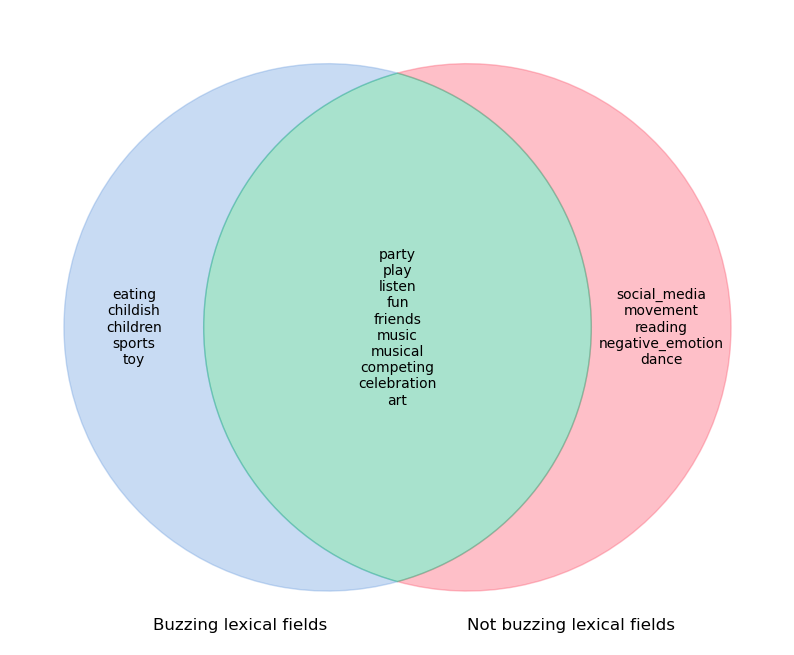

In [46]:
#Venn diagram
A = set(Buz_LFs)
B = set(Nbuz_LFs)

fig, ax = plt.subplots(1,1, figsize=(10, 10))

v = venn2([A, B], ('Buzzing lexical fields', "Not buzzing lexical fields"))
v.set_colors = ['rgb(119, 143, 225)', 'rgb(173, 53, 95)', 'rgb(173, 53, 95)']
v.get_label_by_id('11').set_text('\n'.join(A&B))
v.get_label_by_id('10').set_text('\n'.join(A-B))
v.get_label_by_id('01').set_text('\n'.join(B-A))
v.get_patch_by_id('10').set_color("#77a5e1")
v.get_patch_by_id('01').set_color("#fd6076")
v.get_patch_by_id('11').set_color("#26b782")

plt.savefig("../output/Venn_lexical.png", dpi = 500)


We can see that from the 15 most common topics, 13 are common to both the buzzing and non buzzing channels. The 2 topics specific to the buzzing channels are "messaging" and "childish". Which means that the buzzing channels are more likely to talk about messaging and childish topics. So begginers should focus on these topics to get more views.

In [47]:
#we keep the 15 most common lexical fields of both buzzing and quiet

df_topics = df_topics.loc[most_common_topics]
df_topics.reset_index(inplace=True)
df_topics = df_topics.sort_values(by=['Buzzing'],  ascending=False)
temp_df = df_topics.melt(id_vars='index')


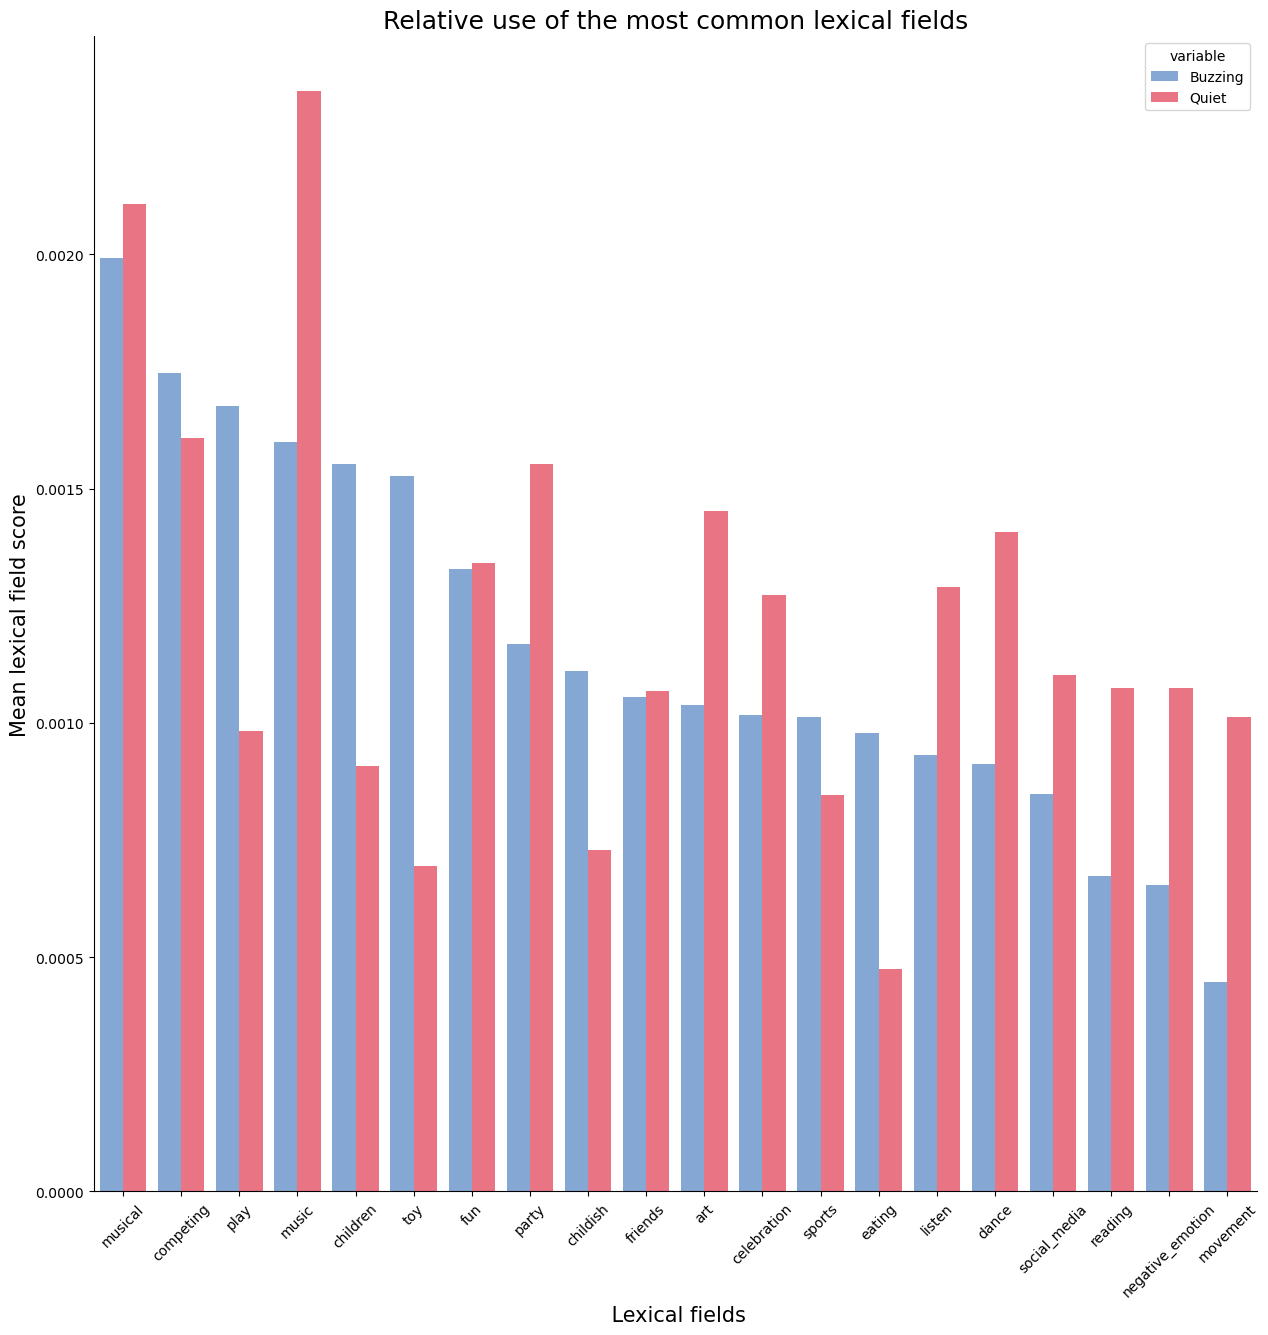

In [48]:

colors = [ "#77a5e1","#fd6076"]
sns.set_palette(sns.color_palette(colors))

#we build a barplot
fig, ax = plt.subplots(1,1, figsize=(15, 15))

sns.barplot(x = 'index', y = 'value', hue = 'variable', data = temp_df)

ax.set_title("Relative use of the most common lexical fields", fontsize = 18)
ax.set_xlabel(" Lexical fields", fontsize = 15)
ax.set_ylabel("Mean lexical field score", fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.savefig("../output/relative_use_lexical.png", dpi = 500)

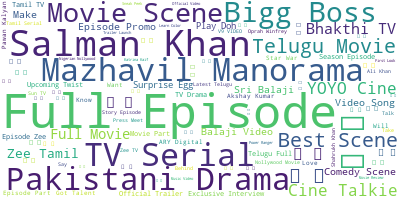

In [49]:
# Join the different processed titles together.
long_string =  buzz_videos['title'].str.cat(sep = ', ')
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=9, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(buzz_videos['title'].str.cat(sep=' '))
# Visualize the word cloud
wordcloud.to_image()

In [50]:
print(long_string[:1200])

បទពុងល្បីខ្លាំងៗ1000%  Song Of Tik Tok REmIx 2019 BrEaK MuSic ClUB ThAi BeK SLoy Djz in Cambodia, REmIx 2019,Song Of Tik Tok,BrEaK MuSic,ClUB ThAi,BeK SLoy,MrR Rayuth Official,Dj btb,DJz Vong, បទពុងល្បី,REmIx 2020,ClUB ThAi,BeK SLoy,Rayuth Official,Mrr Dom,Theara, Song Of Tik Tok,BrEaK MuSic,REmIx 2019,ClUB ThAi,BeK SLoy,Rayuth Official,Thea,Mrr Dom,Theara, ឡេីងខប់ៗREmIx 2029,ClUB ThAi,BeK SLoy,MrR Rayuth Official,Thea,Mrr Dom,Theara, BeK SLoy,Song Of Tik Tok,REmIx 2019,BrEaK MuSic,ClUB ThAi,Dom,MrR Rayuth Official,CHOLCHET REMIX3, Song Of Tik Tok,BrEaK MuSic,REmIx 2019,ClUB ThAi,BeK SLoy,MrR Rayuth Official,CHOLCHET REMIX3,Mr Dii, Song Of Tik Tok,REmIx 2019,BrEaK MuSic,ClUB ThAi,BeK SLoy,Mrr Dom,Mrr Theara,MrR Rayuth Official, Song Of Tik Tok REmIx 2020 BrEaK MuSic ClUB ThAi BeK SLoy MrR Rayuth Official - Mrr DomBek - Theara, Song Of Tik Tok,REmIx 2019,BrEaK MuSic,ClUB ThAi,BeK SLoy,Dom,Mrr Rayuth,Rin Waker,CHOLCHET REMIX3, REmIx 2019,Song Of Tik Tok,BrEaK MuSic,ClUB ThAi,BeK SLoy,CHO

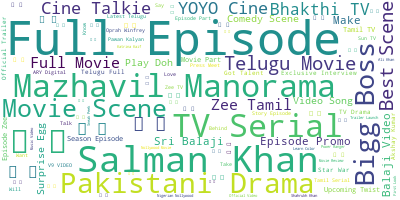

In [51]:
# Join the different processed titles together.
# long_string =  quiet_videos['title'].str.cat(sep = ', ')
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=9, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Sentiment analysis 

Do not work for now and we don't know if we keep it 

In [52]:
!pip install vaderSentiment

In [53]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()
text_1 = buzz_videos['title'][buzz_videos.channel=='UCztk4LFUIk4Ao4TCvpdnDsg']
text_2 =  "The pizza tastes terrible."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
#transform sent_1 and sent_2 into a dataframe
sent_1 = pd.DataFrame.from_dict(sent_1, orient='index').T
sent_2 = pd.DataFrame.from_dict(sent_2, orient='index').T
sent_2

,neg,neu,pos,compound
0,0.508,0.492,0.0,-0.4767


In [54]:
sent_buzzing = []
for i in buzz_videos.channel.unique():
    sent_1 = sentiment.polarity_scores(buzz_videos['title'][buzz_videos.channel==i])
    sent_buzzing.append(pd.DataFrame.from_dict(sent_1, orient='index').T)
sent_buzzing = pd.DataFrame(sent_buzzing, index = buzz_videos.channel.unique())
    
sent_not_buzzing = []
for i in quiet_videos.channel.unique():
    sent_2 = sentiment.polarity_scores(quiet_videos['title'][quiet_videos.channel==i])
    sent_not_buzzing.append(pd.DataFrame.from_dict(sent_2, orient='index').T)
sent_not_buzzing = pd.DataFrame(sent_not_buzzing, index = quiet_videos.channel.unique())


